# COVID-19 Exploratory Data Analysis and prediction using Machine Learning (Linear Regression, Polynomial Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [2]:
data = pd.read_csv('data_set/covid_19_data.csv')

In [3]:
data.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [4]:
data.set_index('SNo', drop=True, inplace=True)

In [5]:
data.head()

ObservationDate Province/State  Country/Region      Last Update  \
SNo                                                                   
1        01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
2        01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
3        01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
4        01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
5        01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

     Confirmed  Deaths  Recovered  
SNo                                
1          1.0     0.0        0.0  
2         14.0     0.0        0.0  
3          6.0     0.0        0.0  
4          1.0     0.0        0.0  
5          0.0     0.0        0.0

In [6]:
data.shape

(116805, 7)

In [7]:
data.isna().sum()

ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

###### There is no need to drop null values here as we will be doing countrywise analysis and not by province/state wise. 

In [8]:
data.describe()

Confirmed         Deaths     Recovered
count  1.168050e+05  116805.000000  1.168050e+05
mean   1.908217e+04     777.745473  1.117002e+04
std    5.825465e+04    2859.184068  6.258701e+04
min    0.000000e+00       0.000000  0.000000e+00
25%    2.450000e+02       3.000000  4.000000e+00
50%    2.148000e+03      42.000000  4.260000e+02
75%    1.037400e+04     331.000000  3.829000e+03
max    1.242770e+06   42072.000000  2.670256e+06

In [9]:
data.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

###### we need to convert observation date into datetime format.

In [10]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

In [11]:
data['ObservationDate'].head()

SNo
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
5   2020-01-22
Name: ObservationDate, dtype: datetime64[ns]

In [12]:
data.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

###### We need to aggregate and take sum of confirmed, deaths and recovered cases because the data shows no of cases of each date countrywise.

In [13]:
datewise_data = data.groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Recovered':'sum','Deaths':'sum'})

Below, we can see the total confiemed cases, recovered and deaths with respect to date. 

In [14]:
datewise_data

Confirmed   Recovered    Deaths
ObservationDate                                  
2020-01-22            555.0        28.0      17.0
2020-01-23            653.0        30.0      18.0
2020-01-24            941.0        36.0      26.0
2020-01-25           1438.0        39.0      42.0
2020-01-26           2118.0        52.0      56.0
...                     ...         ...       ...
2020-09-19       30688150.0  20922189.0  955866.0
2020-09-20       30935011.0  21159459.0  959565.0
2020-09-21       31245797.0  21394593.0  963693.0
2020-09-22       31517087.0  21624434.0  969578.0
2020-09-23       31779835.0  21890442.0  975104.0

[246 rows x 3 columns]

In [15]:
print("Total no. of confirmed cases around the world on 23rd September 2020 :- ", datewise_data['Confirmed'].iloc[-1])
print("Total no. of cured patients around the world on 23rd September 2020 :- ", datewise_data['Recovered'].iloc[-1])
print("Total no. of deaths around the world on 23rd September 2020 :- ", datewise_data['Deaths'].iloc[-1])
print("Total no. of active cases around the world on 23rd September 2020 :- ", datewise_data['Confirmed'].iloc[-1]-datewise_data['Recovered'].iloc[-1]-datewise_data['Deaths'].iloc[-1])
print("Total no. of closed cases around the world on 23rd September 2020 :- ", datewise_data['Recovered'].iloc[-1]+datewise_data['Deaths'].iloc[-1])

Total no. of confirmed cases around the world on 23rd September 2020 :-  31779835.0
Total no. of cured patients around the world on 23rd September 2020 :-  21890442.0
Total no. of deaths around the world on 23rd September 2020 :-  975104.0
Total no. of active cases around the world on 23rd September 2020 :-  8914289.0
Total no. of closed cases around the world on 23rd September 2020 :-  22865546.0


###### we are taking diff to show no. of cases that arrived on that respective date. Eg: Cases(Today) - Cases(Yesterday)

In [16]:
data_diff = datewise_data.diff(periods=1)

In [17]:
data_diff

Confirmed  Recovered  Deaths
ObservationDate                              
2020-01-22             NaN        NaN     NaN
2020-01-23            98.0        2.0     1.0
2020-01-24           288.0        6.0     8.0
2020-01-25           497.0        3.0    16.0
2020-01-26           680.0       13.0    14.0
...                    ...        ...     ...
2020-09-19        281953.0   239079.0  5346.0
2020-09-20        246861.0   237270.0  3699.0
2020-09-21        310786.0   235134.0  4128.0
2020-09-22        271290.0   229841.0  5885.0
2020-09-23        262748.0   266008.0  5526.0

[246 rows x 3 columns]

In [18]:
print("Total no. of confirmed cases arrived around the world on 23rd September 2020 :- ", data_diff['Confirmed'].iloc[-1])
print("Total no. of patients cured around the world on 23rd September 2020 :- ", data_diff['Recovered'].iloc[-1])
print("Total no. of deaths happened around the world on 23rd September 2020 :- ", data_diff['Deaths'].iloc[-1])

Total no. of confirmed cases arrived around the world on 23rd September 2020 :-  262748.0
Total no. of patients cured around the world on 23rd September 2020 :-  266008.0
Total no. of deaths happened around the world on 23rd September 2020 :-  5526.0


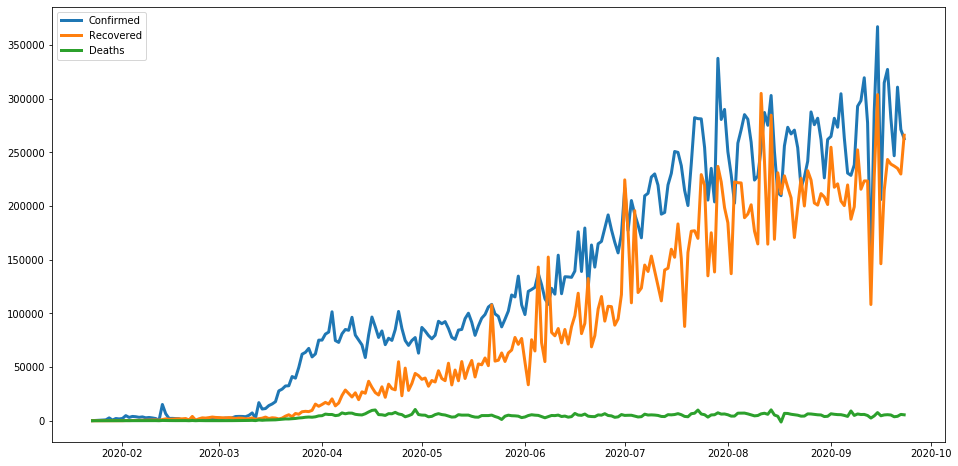

In [19]:
# import pylab
plt.figure(figsize=(16,8))
plt.plot(data_diff.index.date, data_diff['Confirmed'], lw=3, label='Confirmed')
plt.plot(data_diff.index.date, data_diff['Recovered'], lw=3, label='Recovered')
plt.plot(data_diff.index.date, data_diff['Deaths'], lw=3, label='Deaths')
# plt.plot(datewise_data_weekly.index.date, datewise_data_weekly['Confirmed']-datewise_data_weekly['Deaths']-datewise_data_weekly['Recovered'], lw=3, label='Active')
# plt.plot(datewise_data_weekly.index.date, datewise_data_weekly['Deaths']+datewise_data_weekly['Recovered'], lw=3, label='Closed Cases')
plt.legend()
# pylab.show()

###### Resampling the data into week and taking mean of 7 days.

In [20]:
#W is for specifying the data to be sampled weekly.
datewise_data_weekly = datewise_data.resample('W').mean()

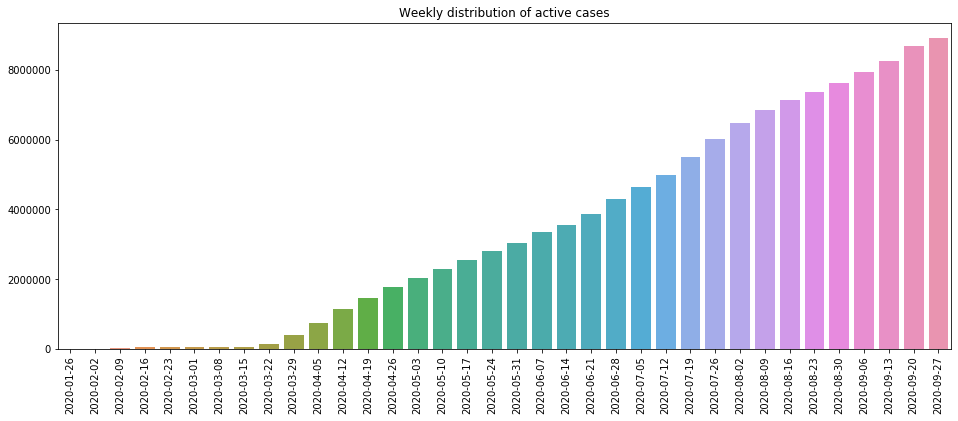

In [21]:
plt.figure(figsize=(16,6))
sns.barplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Confirmed']-datewise_data_weekly['Recovered']-datewise_data_weekly['Deaths']);
plt.title('Weekly distribution of active cases')
plt.xticks(rotation='vertical');

Analysis of Confirmed, Recovered, , Deaths, Active, Closed

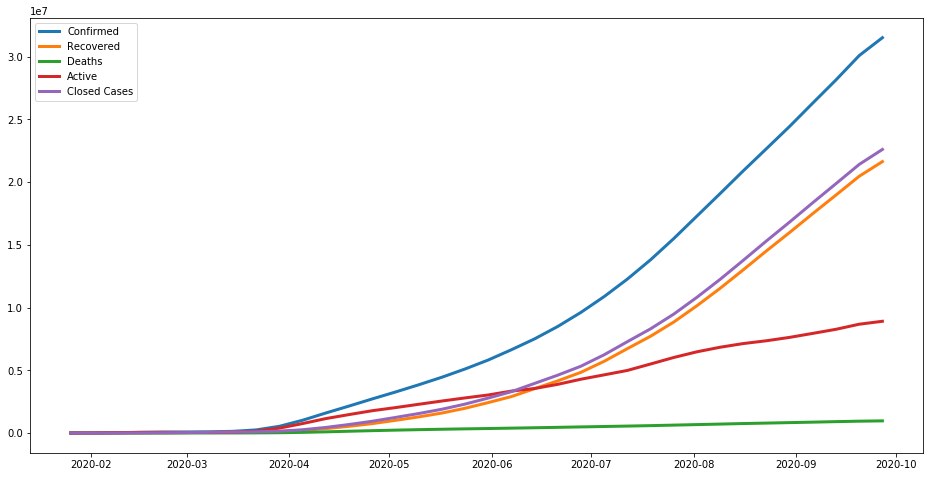

In [22]:
# import pylab
plt.figure(figsize=(16,8))
plt.plot(datewise_data_weekly.index.date, datewise_data_weekly['Confirmed'], lw=3, label='Confirmed')
plt.plot(datewise_data_weekly.index.date, datewise_data_weekly['Recovered'], lw=3, label='Recovered')
plt.plot(datewise_data_weekly.index.date, datewise_data_weekly['Deaths'], lw=3, label='Deaths')
plt.plot(datewise_data_weekly.index.date, datewise_data_weekly['Confirmed']-datewise_data_weekly['Deaths']-datewise_data_weekly['Recovered'], lw=3, label='Active')
plt.plot(datewise_data_weekly.index.date, datewise_data_weekly['Deaths']+datewise_data_weekly['Recovered'], lw=3, label='Closed Cases')
plt.legend()
# pylab.show()

Time Series analysis of each week. Here we can analyse which week had the most or least no of cases of each type. It simply means the above analysis is on the accumulated data which has the addition of cases from previous day or week as well. Here, Each week will data from that specific week only



In [23]:
datewise_data_weekly['Active'] = datewise_data_weekly['Confirmed']-datewise_data_weekly['Recovered']-datewise_data_weekly['Deaths']
datewise_data_weekly['Closed Cases'] = datewise_data_weekly['Recovered']+datewise_data_weekly['Deaths']

In [24]:
datewise_data_weekly.head()

Confirmed     Recovered       Deaths        Active  \
ObservationDate                                                          
2020-01-26        1141.000000     37.000000    31.800000   1072.200000   
2020-02-02        8807.857143    202.142857   193.000000   8412.714286   
2020-02-09       30555.857143   1708.142857   649.571429  28198.142857   
2020-02-16       57186.142857   6913.142857  1367.714286  48905.285714   
2020-02-23       76380.714286  18057.571429  2203.142857  56120.000000   

                 Closed Cases  
ObservationDate                
2020-01-26          68.800000  
2020-02-02         395.142857  
2020-02-09        2357.714286  
2020-02-16        8280.857143  
2020-02-23       20260.714286

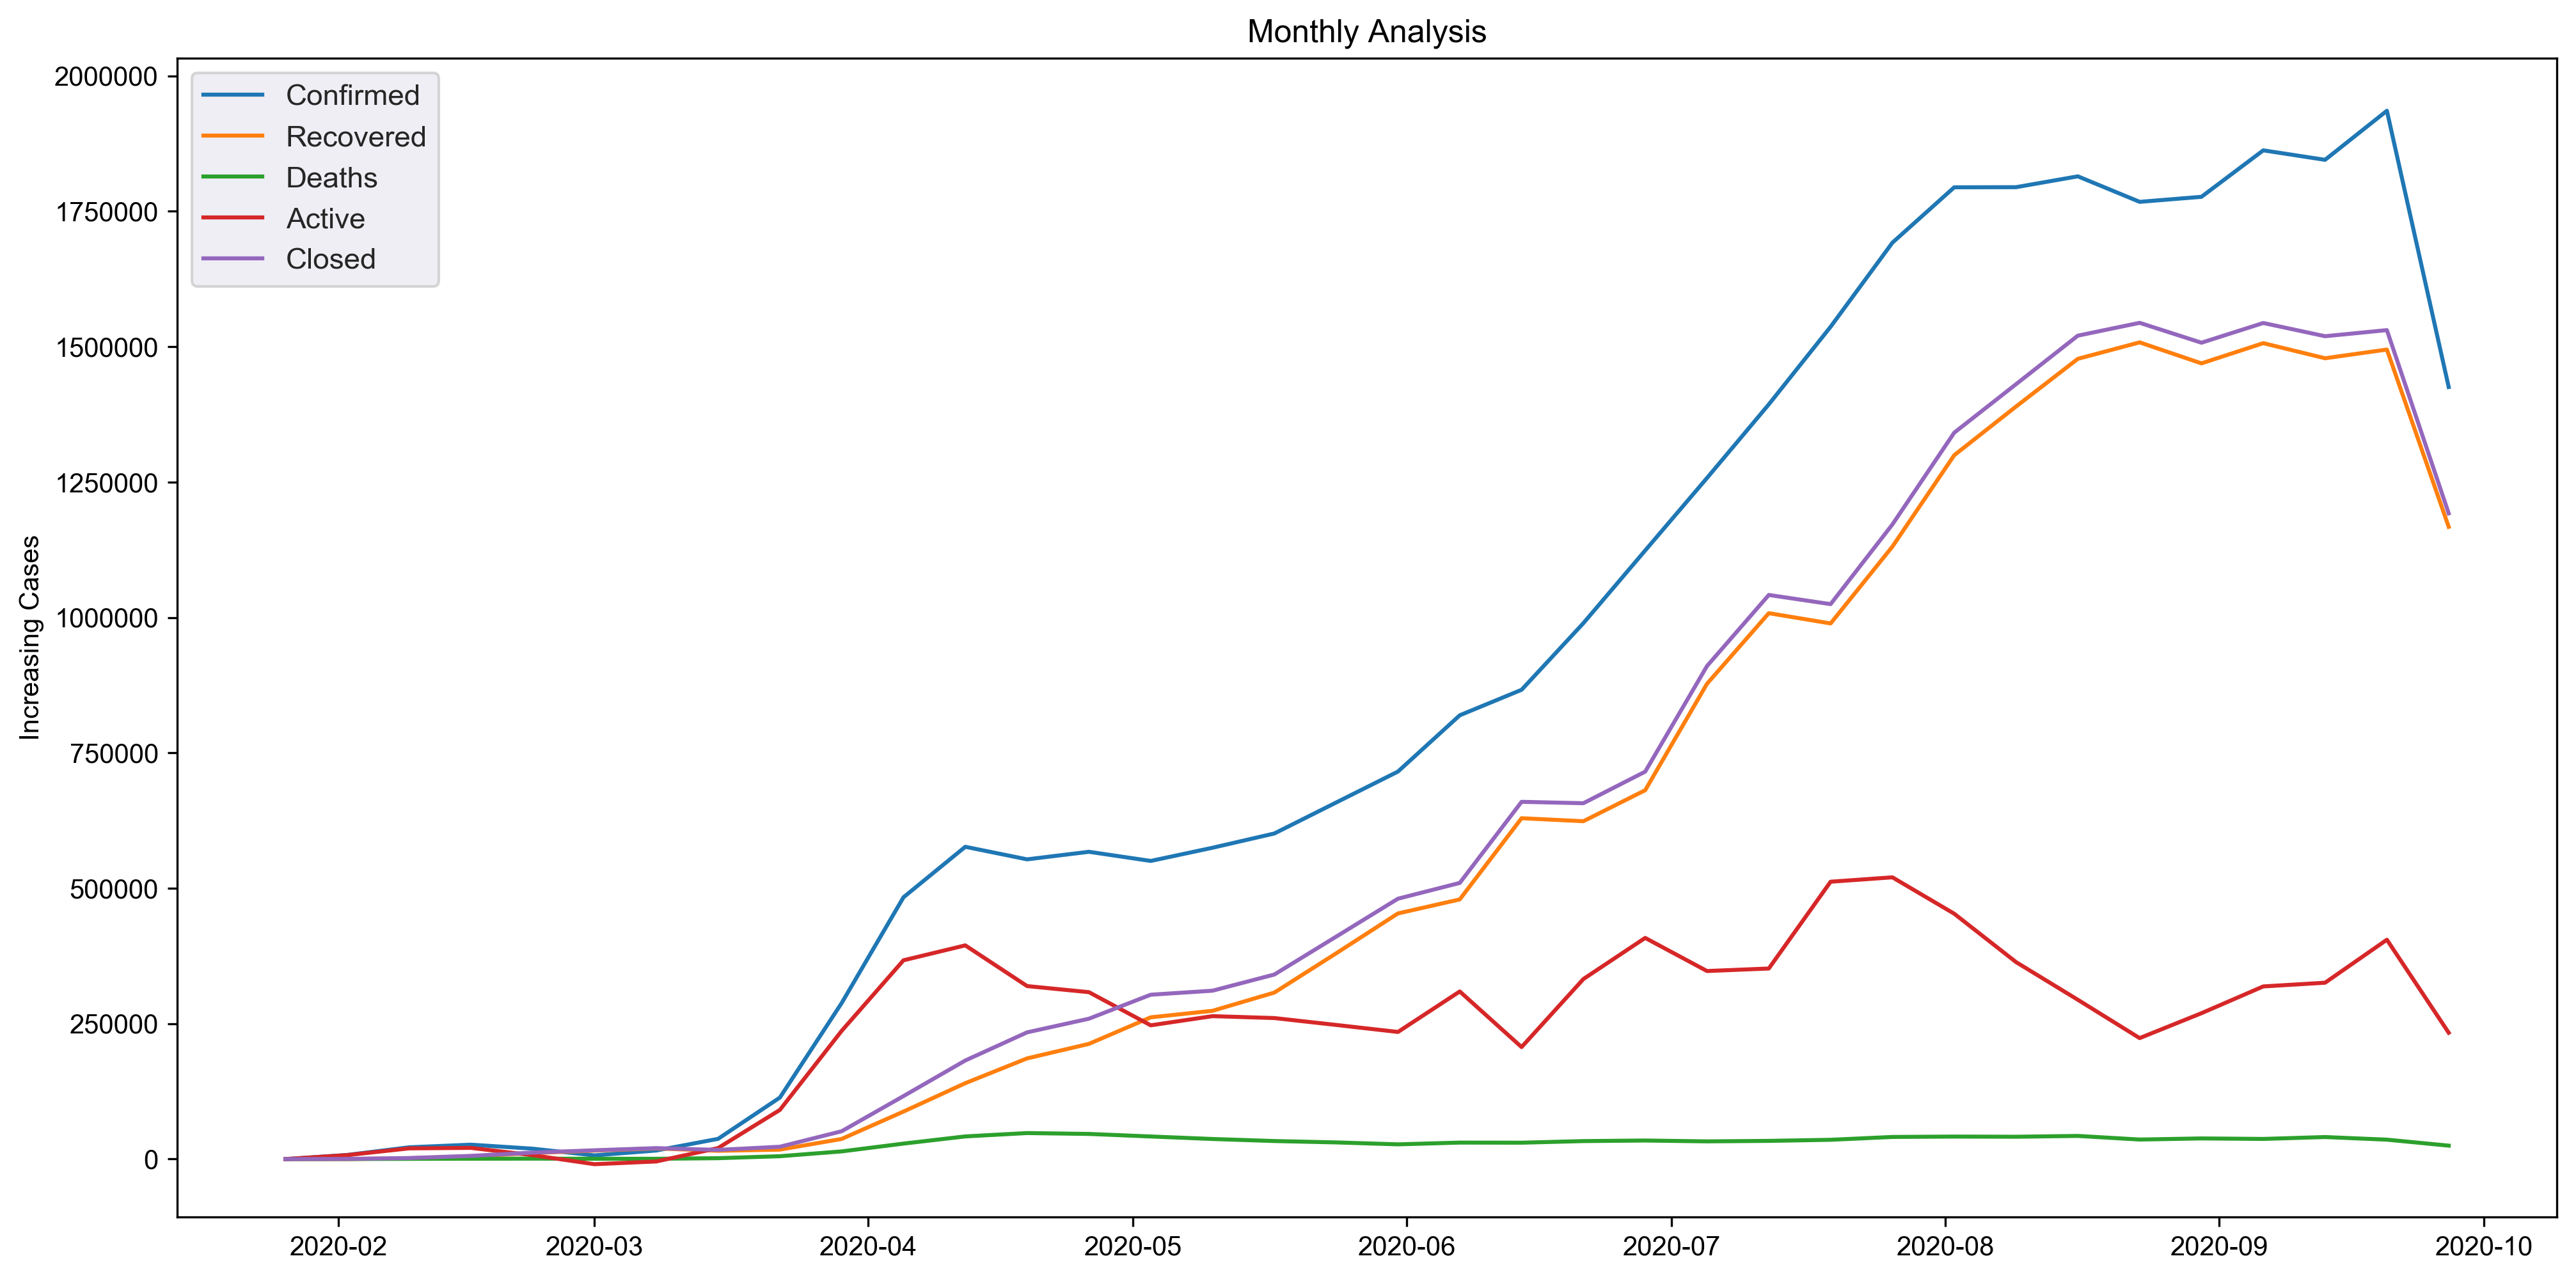

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8), dpi=300)
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Confirmed'].diff().fillna(0))
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Recovered'].diff().fillna(0))
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Deaths'].diff().fillna(0))
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Active'].diff().fillna(0))
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Closed Cases'].diff().fillna(0))
sns.set()
ax.set_ylabel('Increasing Cases')
plt.title('Monthly Analysis')
plt.legend(['Confirmed','Recovered','Deaths','Active','Closed'])
plt.show()


In [26]:
data_diff_weekly = data_diff.resample('w').sum()

In [27]:
data_diff_weekly.head(10)

Confirmed  Recovered   Deaths
ObservationDate                               
2020-01-26          1563.0       24.0     39.0
2020-02-02         14669.0      420.0    306.0
2020-02-09         23364.0     2772.0    544.0
2020-02-16         31075.0     7621.0    864.0
2020-02-23          7759.0    12529.0    699.0
2020-03-01          9386.0    19322.0    527.0
2020-03-08         21464.0    17979.0    807.0
2020-03-15         57612.0    15339.0   2637.0
2020-03-22        169675.0    21209.0   8183.0
2020-03-29        383018.0    51833.0  19302.0

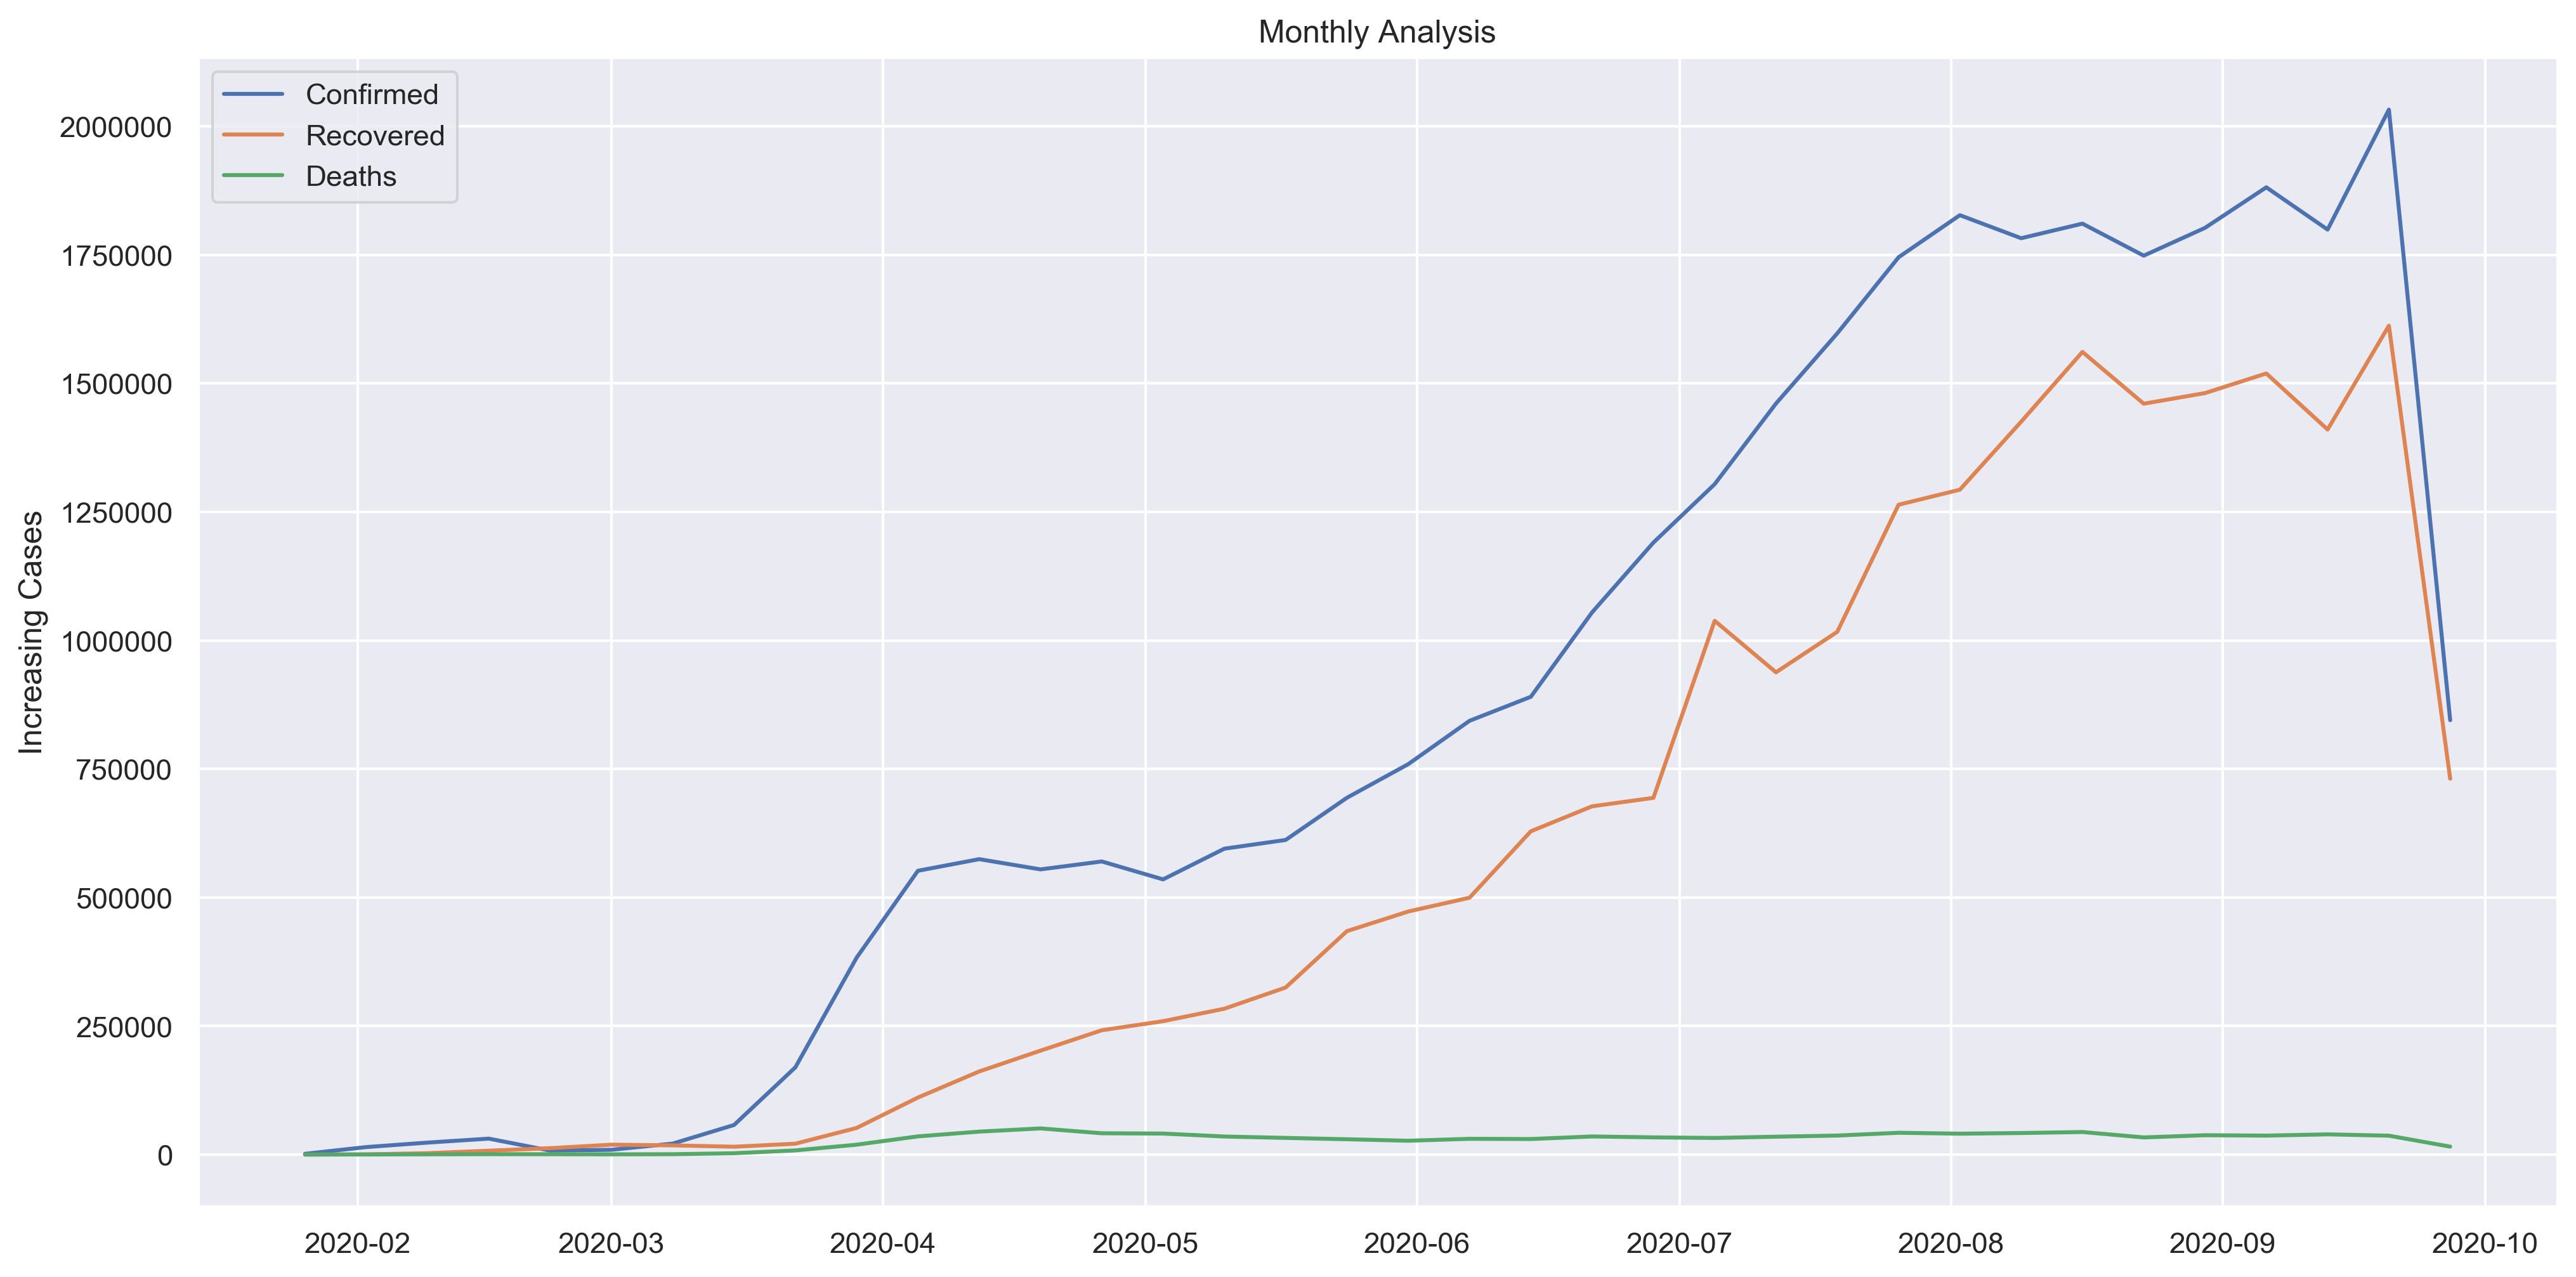

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8), dpi=300)
sns.lineplot(x=data_diff_weekly.index.date, y=data_diff_weekly['Confirmed'])
sns.lineplot(x=data_diff_weekly.index.date, y=data_diff_weekly['Recovered'])
sns.lineplot(x=data_diff_weekly.index.date, y=data_diff_weekly['Deaths'])
# sns.lineplot(x=data_diff_weekly.index.date, y=datewise_data_weekly['Active'].diff().fillna(0))
# sns.lineplot(x=data_diff_weekly.index.date, y=datewise_data_weekly['Closed Cases'].diff().fillna(0))
sns.set()
ax.set_ylabel('Increasing Cases')
plt.title('Monthly Analysis')
plt.legend(['Confirmed','Recovered','Deaths'])
plt.show()


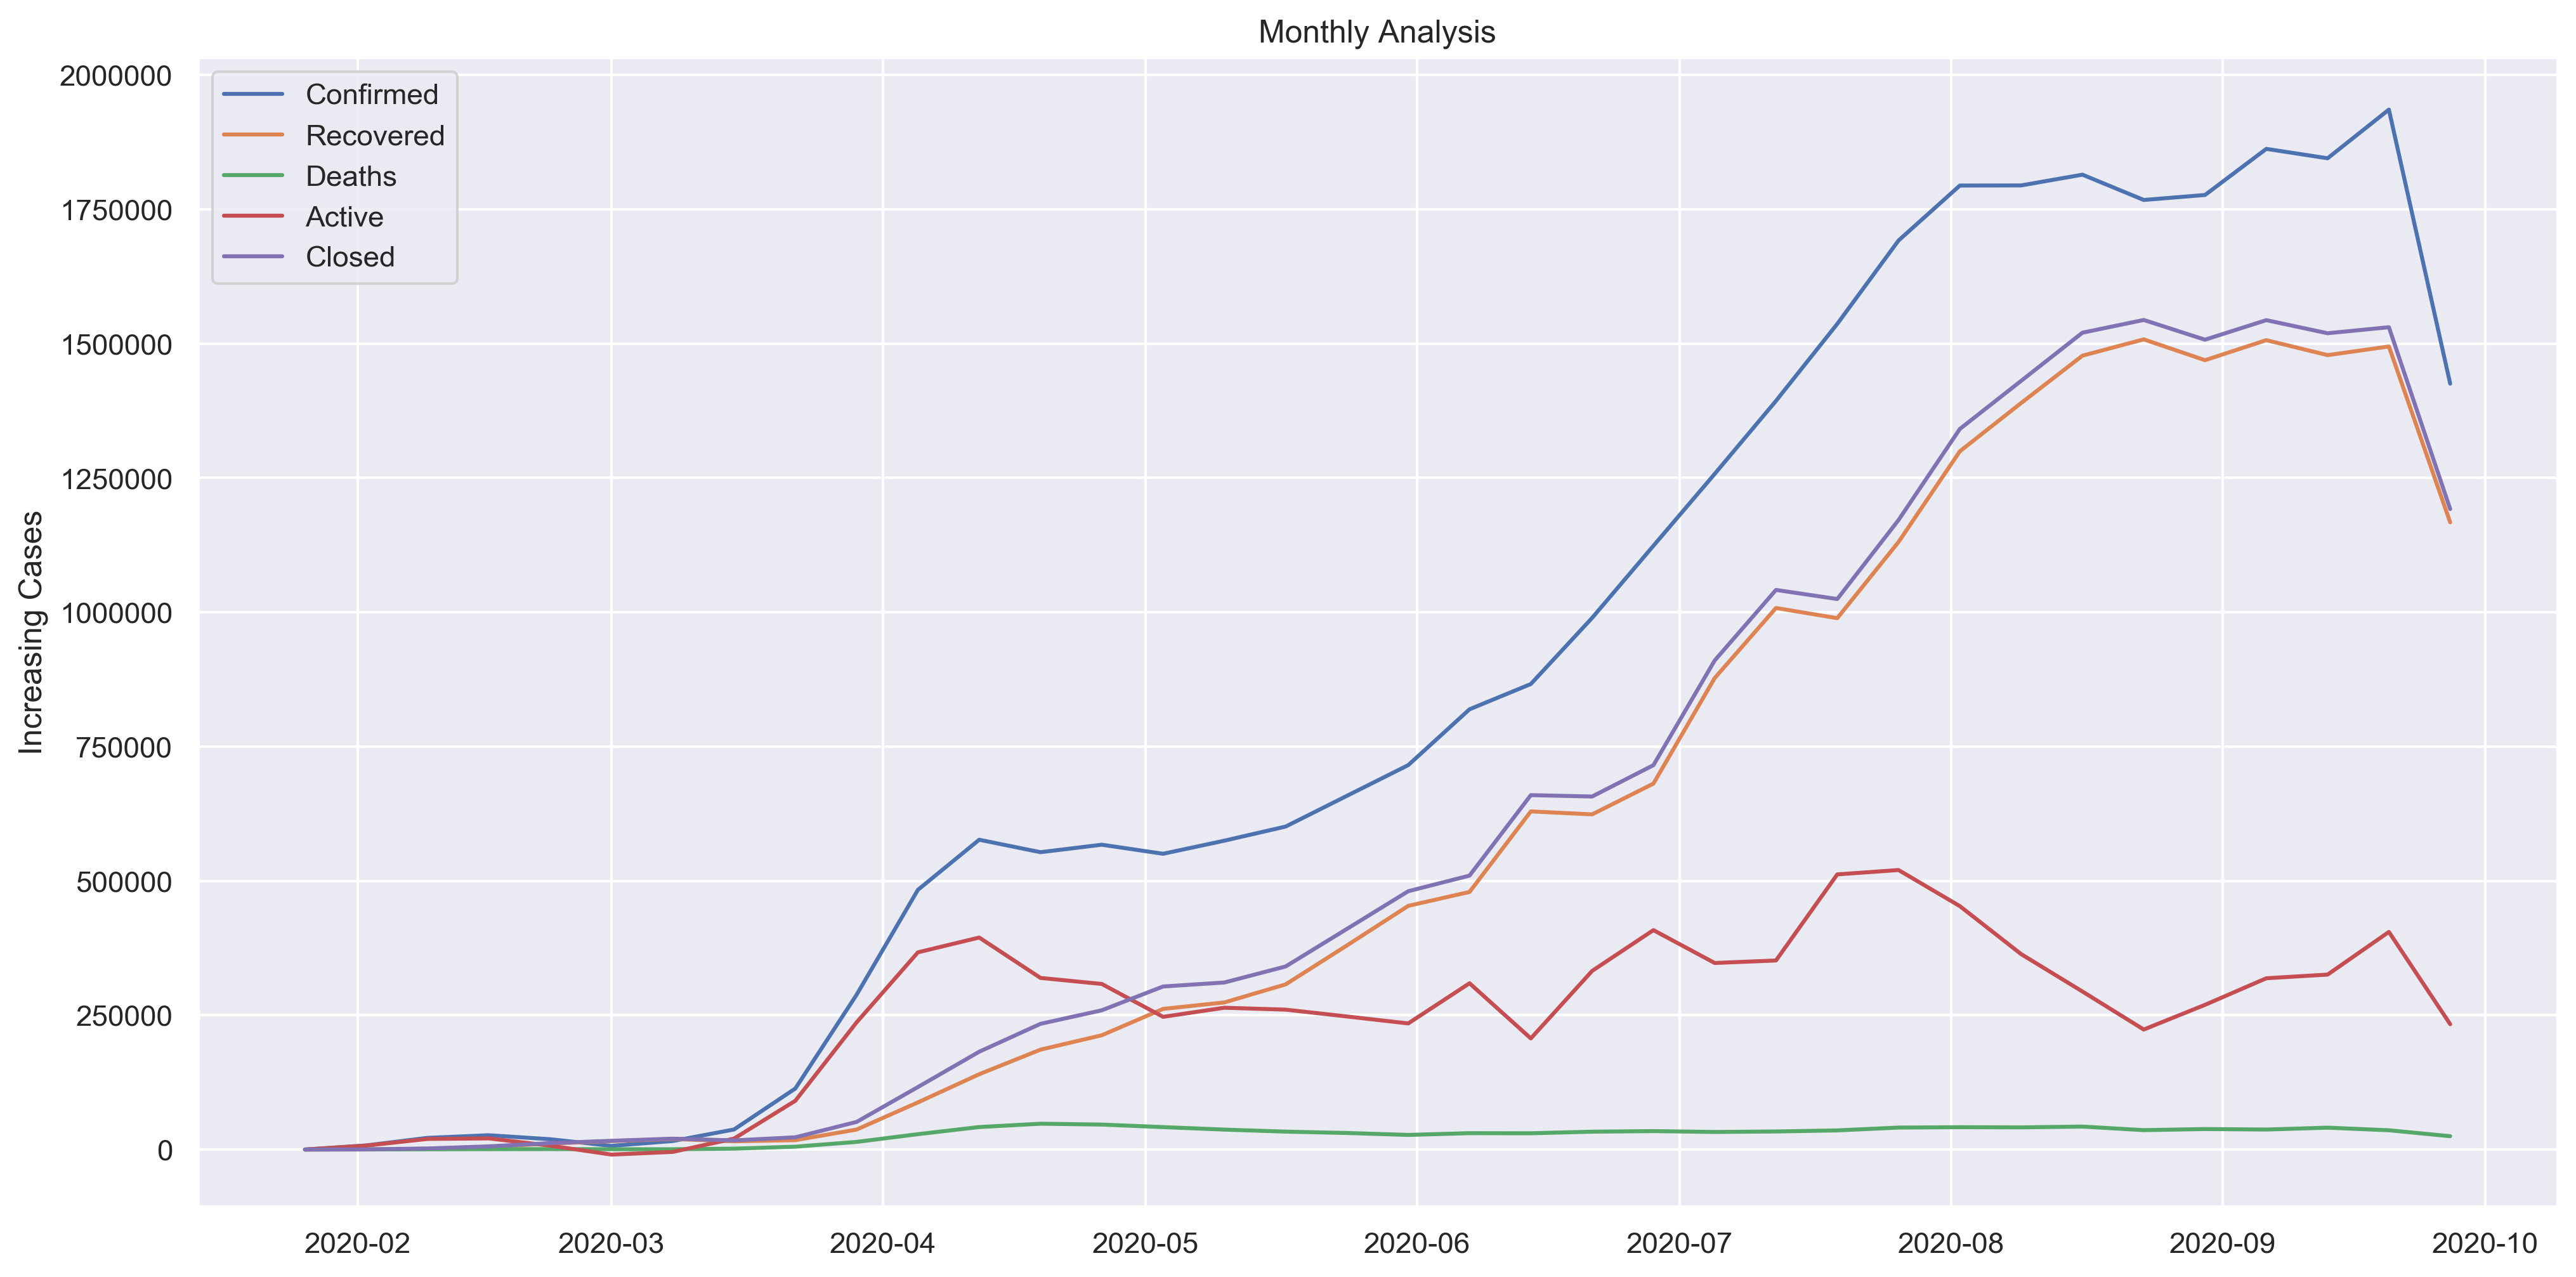

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8), dpi=300)
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Confirmed'].diff().fillna(0))
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Recovered'].diff().fillna(0))
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Deaths'].diff().fillna(0))
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Active'].diff().fillna(0))
sns.lineplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Closed Cases'].diff().fillna(0))
sns.set()
ax.set_ylabel('Increasing Cases')
plt.title('Monthly Analysis')
plt.legend(['Confirmed','Recovered','Deaths','Active','Closed'])
plt.show()


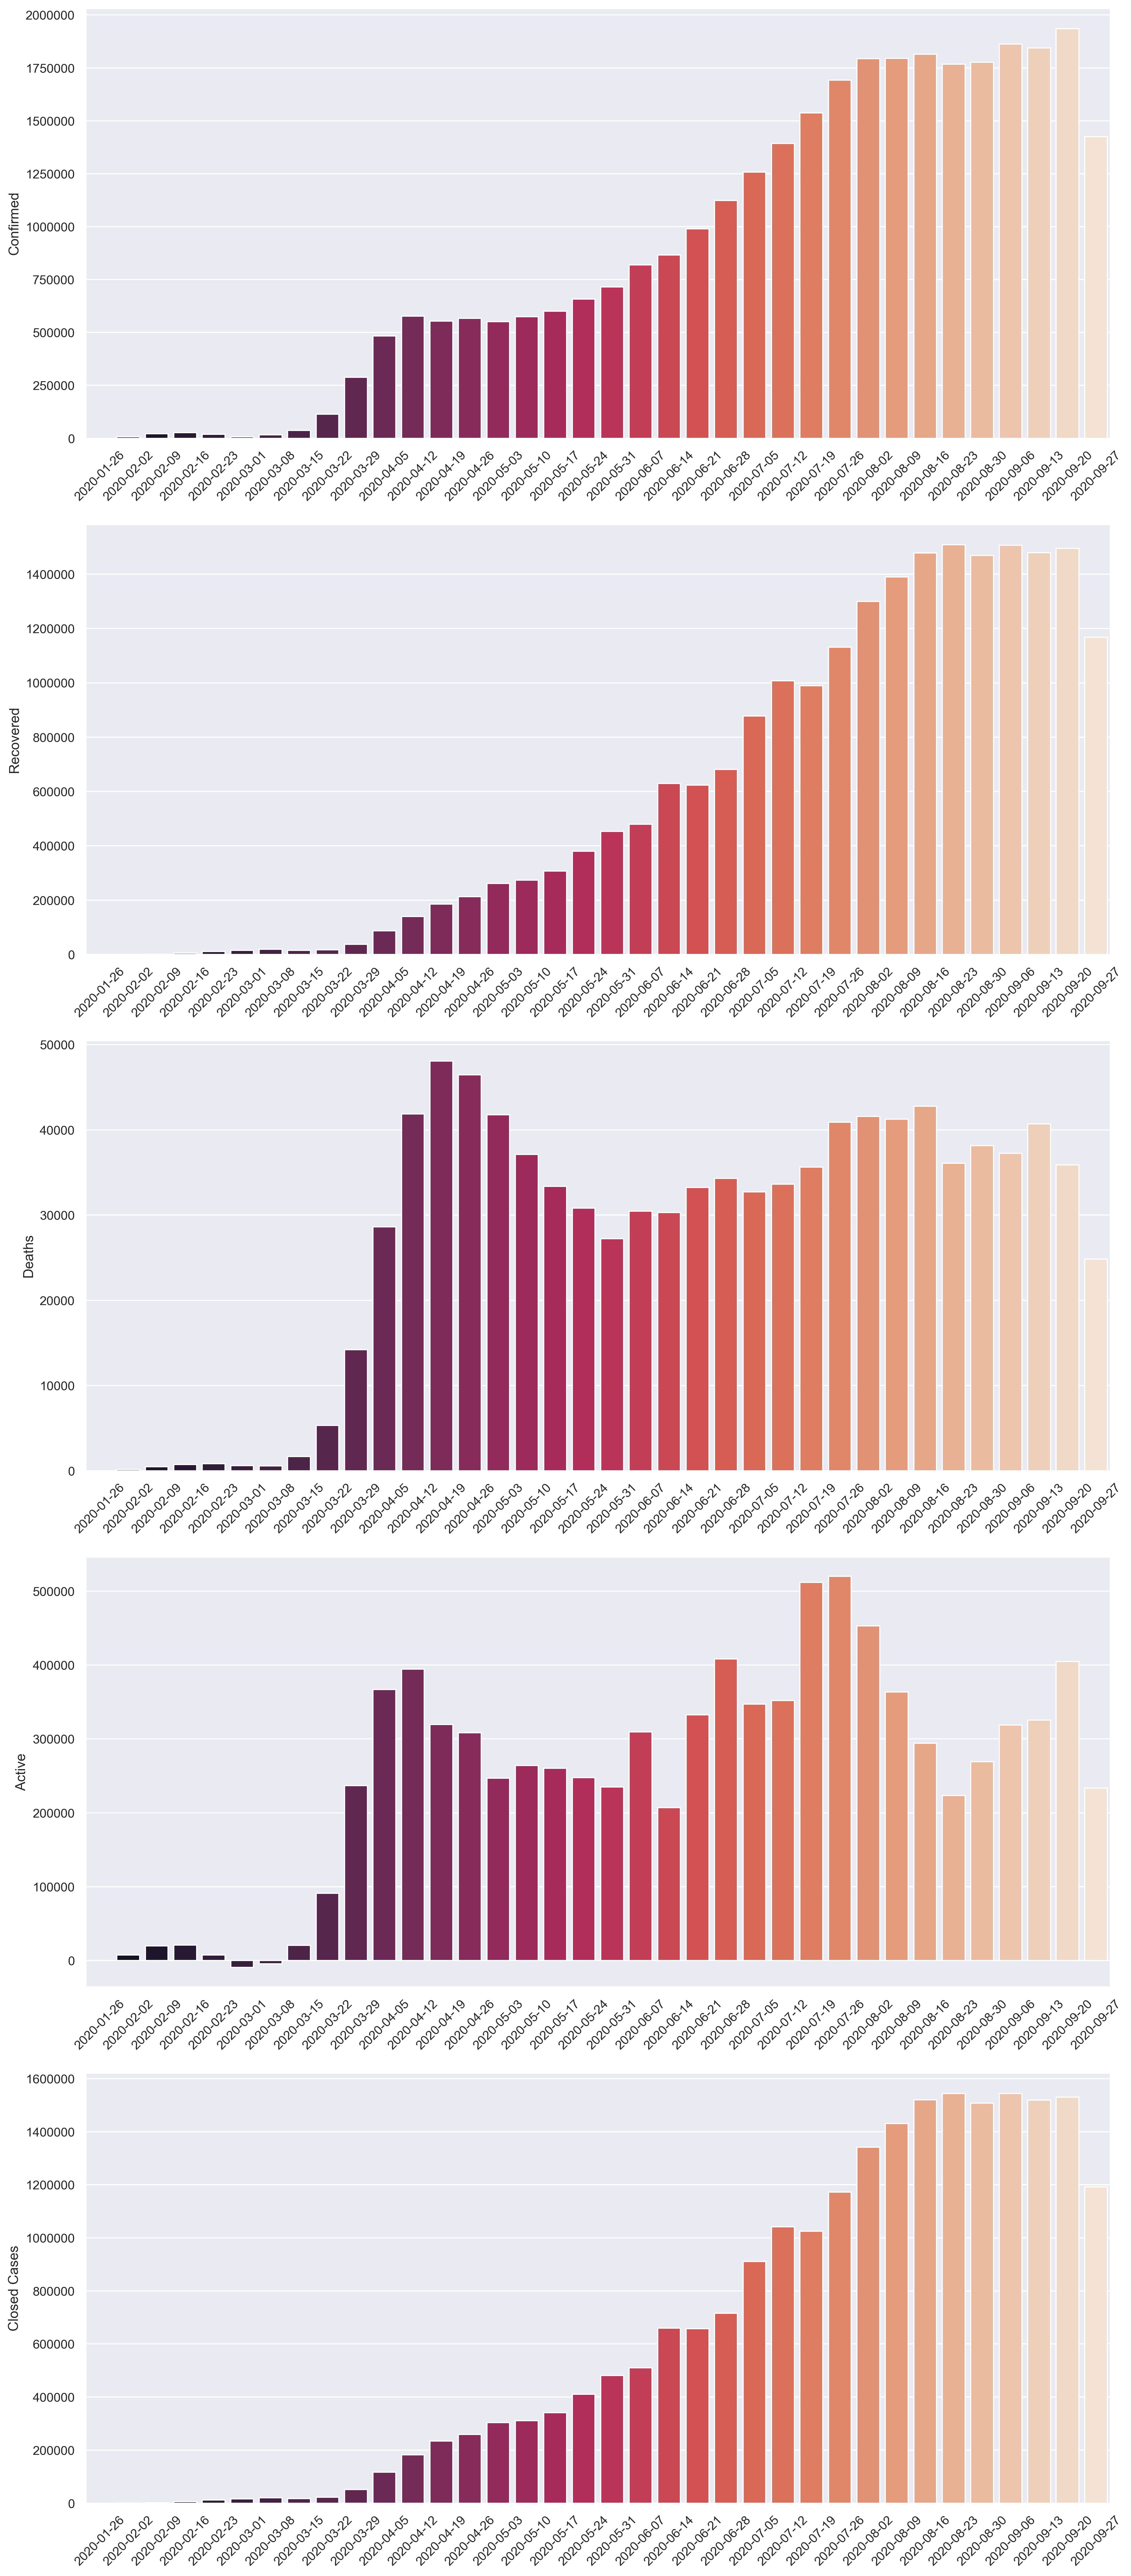

In [30]:
fig, ax = plt.subplots(5, 1, figsize = (16, 40), dpi=300)
sns.barplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Confirmed'].diff().fillna(0), ax=ax[0], palette="rocket")
sns.barplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Recovered'].diff().fillna(0), ax=ax[1], palette="rocket")
sns.barplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Deaths'].diff().fillna(0), ax=ax[2], palette="rocket")
sns.barplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Active'].diff().fillna(0), ax=ax[3], palette="rocket")
sns.barplot(x=datewise_data_weekly.index.date, y=datewise_data_weekly['Closed Cases'].diff().fillna(0), ax=ax[4], palette="rocket")
ax[0].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[1].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[2].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[3].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[4].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);

In [31]:
print("Weekly Average increase in number of Confirmed cases worldwide :- ", np.round(datewise_data_weekly['Confirmed'].diff().fillna(0).mean()))
print("Weekly Average increase in number Recovered cases worldwide :- ", np.round(datewise_data_weekly['Recovered'].diff().fillna(0).mean()))
print("Weekly Average increase in number Death cases worldwide :- ", np.round(datewise_data_weekly['Deaths'].diff().fillna(0).mean()))
print("Weekly Average increase in number Active cases worldwide :- ", np.round(datewise_data_weekly['Active'].diff().fillna(0).mean()))
print("Weekly Average increase in number Closed cases worldwide :- ", np.round(datewise_data_weekly['Closed Cases'].diff().fillna(0).mean()))

Weekly Average increase in number of Confirmed cases worldwide :-  875364.0
Weekly Average increase in number Recovered cases worldwide :-  601013.0
Weekly Average increase in number Death cases worldwide :-  26929.0
Weekly Average increase in number Active cases worldwide :-  247423.0
Weekly Average increase in number Closed cases worldwide :-  627941.0


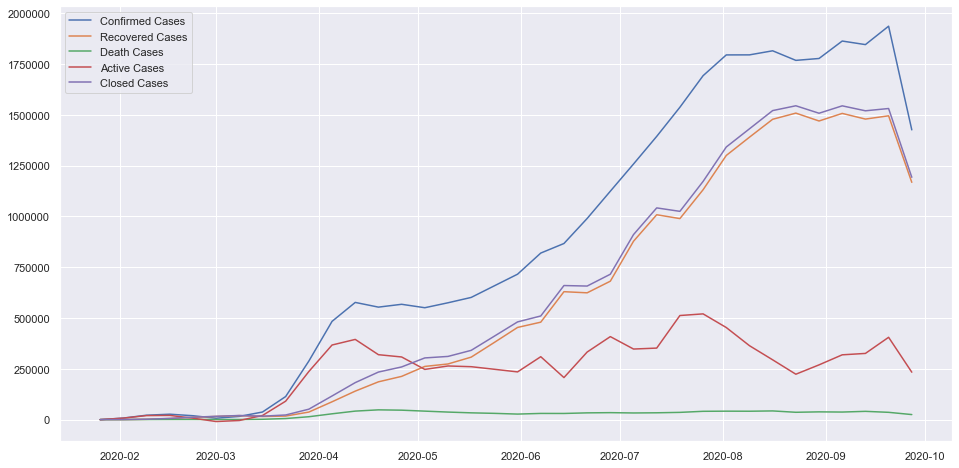

In [32]:
plt.figure(figsize=(16,8))
sns.set()
plt.plot(datewise_data_weekly['Confirmed'].diff().fillna(0), label='Confirmed Cases')
plt.plot(datewise_data_weekly['Recovered'].diff().fillna(0), label='Recovered Cases')
plt.plot(datewise_data_weekly['Deaths'].diff().fillna(0), label='Death Cases')
plt.plot(datewise_data_weekly['Active'].diff().fillna(0), label='Active Cases')
plt.plot(datewise_data_weekly['Closed Cases'].diff().fillna(0), label='Closed Cases')
plt.legend()

In [33]:
#Countrywise Analysis

In [34]:
data.head()

ObservationDate Province/State  Country/Region      Last Update  \
SNo                                                                   
1        2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
2        2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
3        2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
4        2020-01-22         Fujian  Mainland China  1/22/2020 17:00   
5        2020-01-22          Gansu  Mainland China  1/22/2020 17:00   

     Confirmed  Deaths  Recovered  
SNo                                
1          1.0     0.0        0.0  
2         14.0     0.0        0.0  
3          6.0     0.0        0.0  
4          1.0     0.0        0.0  
5          0.0     0.0        0.0

In [35]:
country_analysis = data[data['ObservationDate']==data['ObservationDate'].max()].groupby(['Country/Region']).acountry_analysis = data[data['ObservationDate']==data['ObservationDate'].max()].groupby(['Country/Region']).agg({'Confirmed':'sum', 'Recovered':'sum','Deaths':'sum'})

In [36]:
country_analysis['Recovery Rate'] = (country_analysis['Recovered']/country_analysis['Confirmed'])*100
country_analysis['Mortality Rate'] = (country_analysis['Deaths']/country_analysis['Confirmed'])*100

In [37]:
country_analysis.sort_values(by='Confirmed', ascending=False)

Confirmed  Recovered    Deaths  Recovery Rate  \
Country/Region                                                         
US                     6933548.0  2670256.0  201884.0      38.512115   
India                  5646010.0  4587613.0   90020.0      81.254071   
Brazil                 4591364.0  4046827.0  138105.0      88.139973   
Russia                 1117487.0   920602.0   19720.0      82.381451   
Colombia                784268.0   662277.0   24746.0      84.445241   
...                          ...        ...       ...            ...   
Laos                        23.0       22.0       0.0      95.652174   
Saint Kitts and Nevis       19.0       17.0       0.0      89.473684   
Holy See                    12.0       12.0       0.0     100.000000   
Western Sahara              10.0        8.0       1.0      80.000000   
MS Zaandam                   9.0        0.0       2.0       0.000000   

                       Mortality Rate  
Country/Region                         
US                           2.911698  
India                        1.594400  
Brazil                       3.007930  
Russia                       1.764674  
Colombia                     3.155299  
...                               ...  
Laos                         0.000000  
Saint Kitts and Nevis        0.000000  
Holy See                     0.000000  
Western Sahara              10.000000  
MS Zaandam                  22.222222  

[190 rows x 5 columns]

In [38]:
country_analysis_top20 = country_analysis.sort_values(by='Confirmed', ascending=False)[:20]

In [39]:
country_analysis_top20

Confirmed  Recovered    Deaths  Recovery Rate  Mortality Rate
Country/Region                                                               
US              6933548.0  2670256.0  201884.0      38.512115        2.911698
India           5646010.0  4587613.0   90020.0      81.254071        1.594400
Brazil          4591364.0  4046827.0  138105.0      88.139973        3.007930
Russia          1117487.0   920602.0   19720.0      82.381451        1.764674
Colombia         784268.0   662277.0   24746.0      84.445241        3.155299
Peru             776546.0   636489.0   31568.0      81.964108        4.065181
Mexico           710049.0   601611.0   74949.0      84.728096       10.555469
Spain            693556.0   150376.0   31034.0      21.681883        4.474621
South Africa     665188.0   594229.0   16206.0      89.332489        2.436304
Argentina        664799.0   525486.0   14376.0      79.044343        2.162458
France           508456.0    96498.0   31447.0      18.978633        6.184803
Chile            449903.0   425165.0   12345.0      94.501481        2.743925
Iran             432798.0   365846.0   24840.0      84.530428        5.739398
UK               412245.0     2247.0   41951.0       0.545064       10.176230
Bangladesh       353844.0   262953.0    5044.0      74.313257        1.425487
Iraq             332635.0   264988.0    8754.0      79.663295        2.631713
Saudi Arabia     331359.0   313786.0    4569.0      94.696688        1.378867
Pakistan         308217.0   294392.0    6437.0      95.514524        2.088464
Turkey           308069.0   270723.0    7711.0      87.877391        2.503011
Italy            302537.0   220665.0   35758.0      72.938186       11.819381

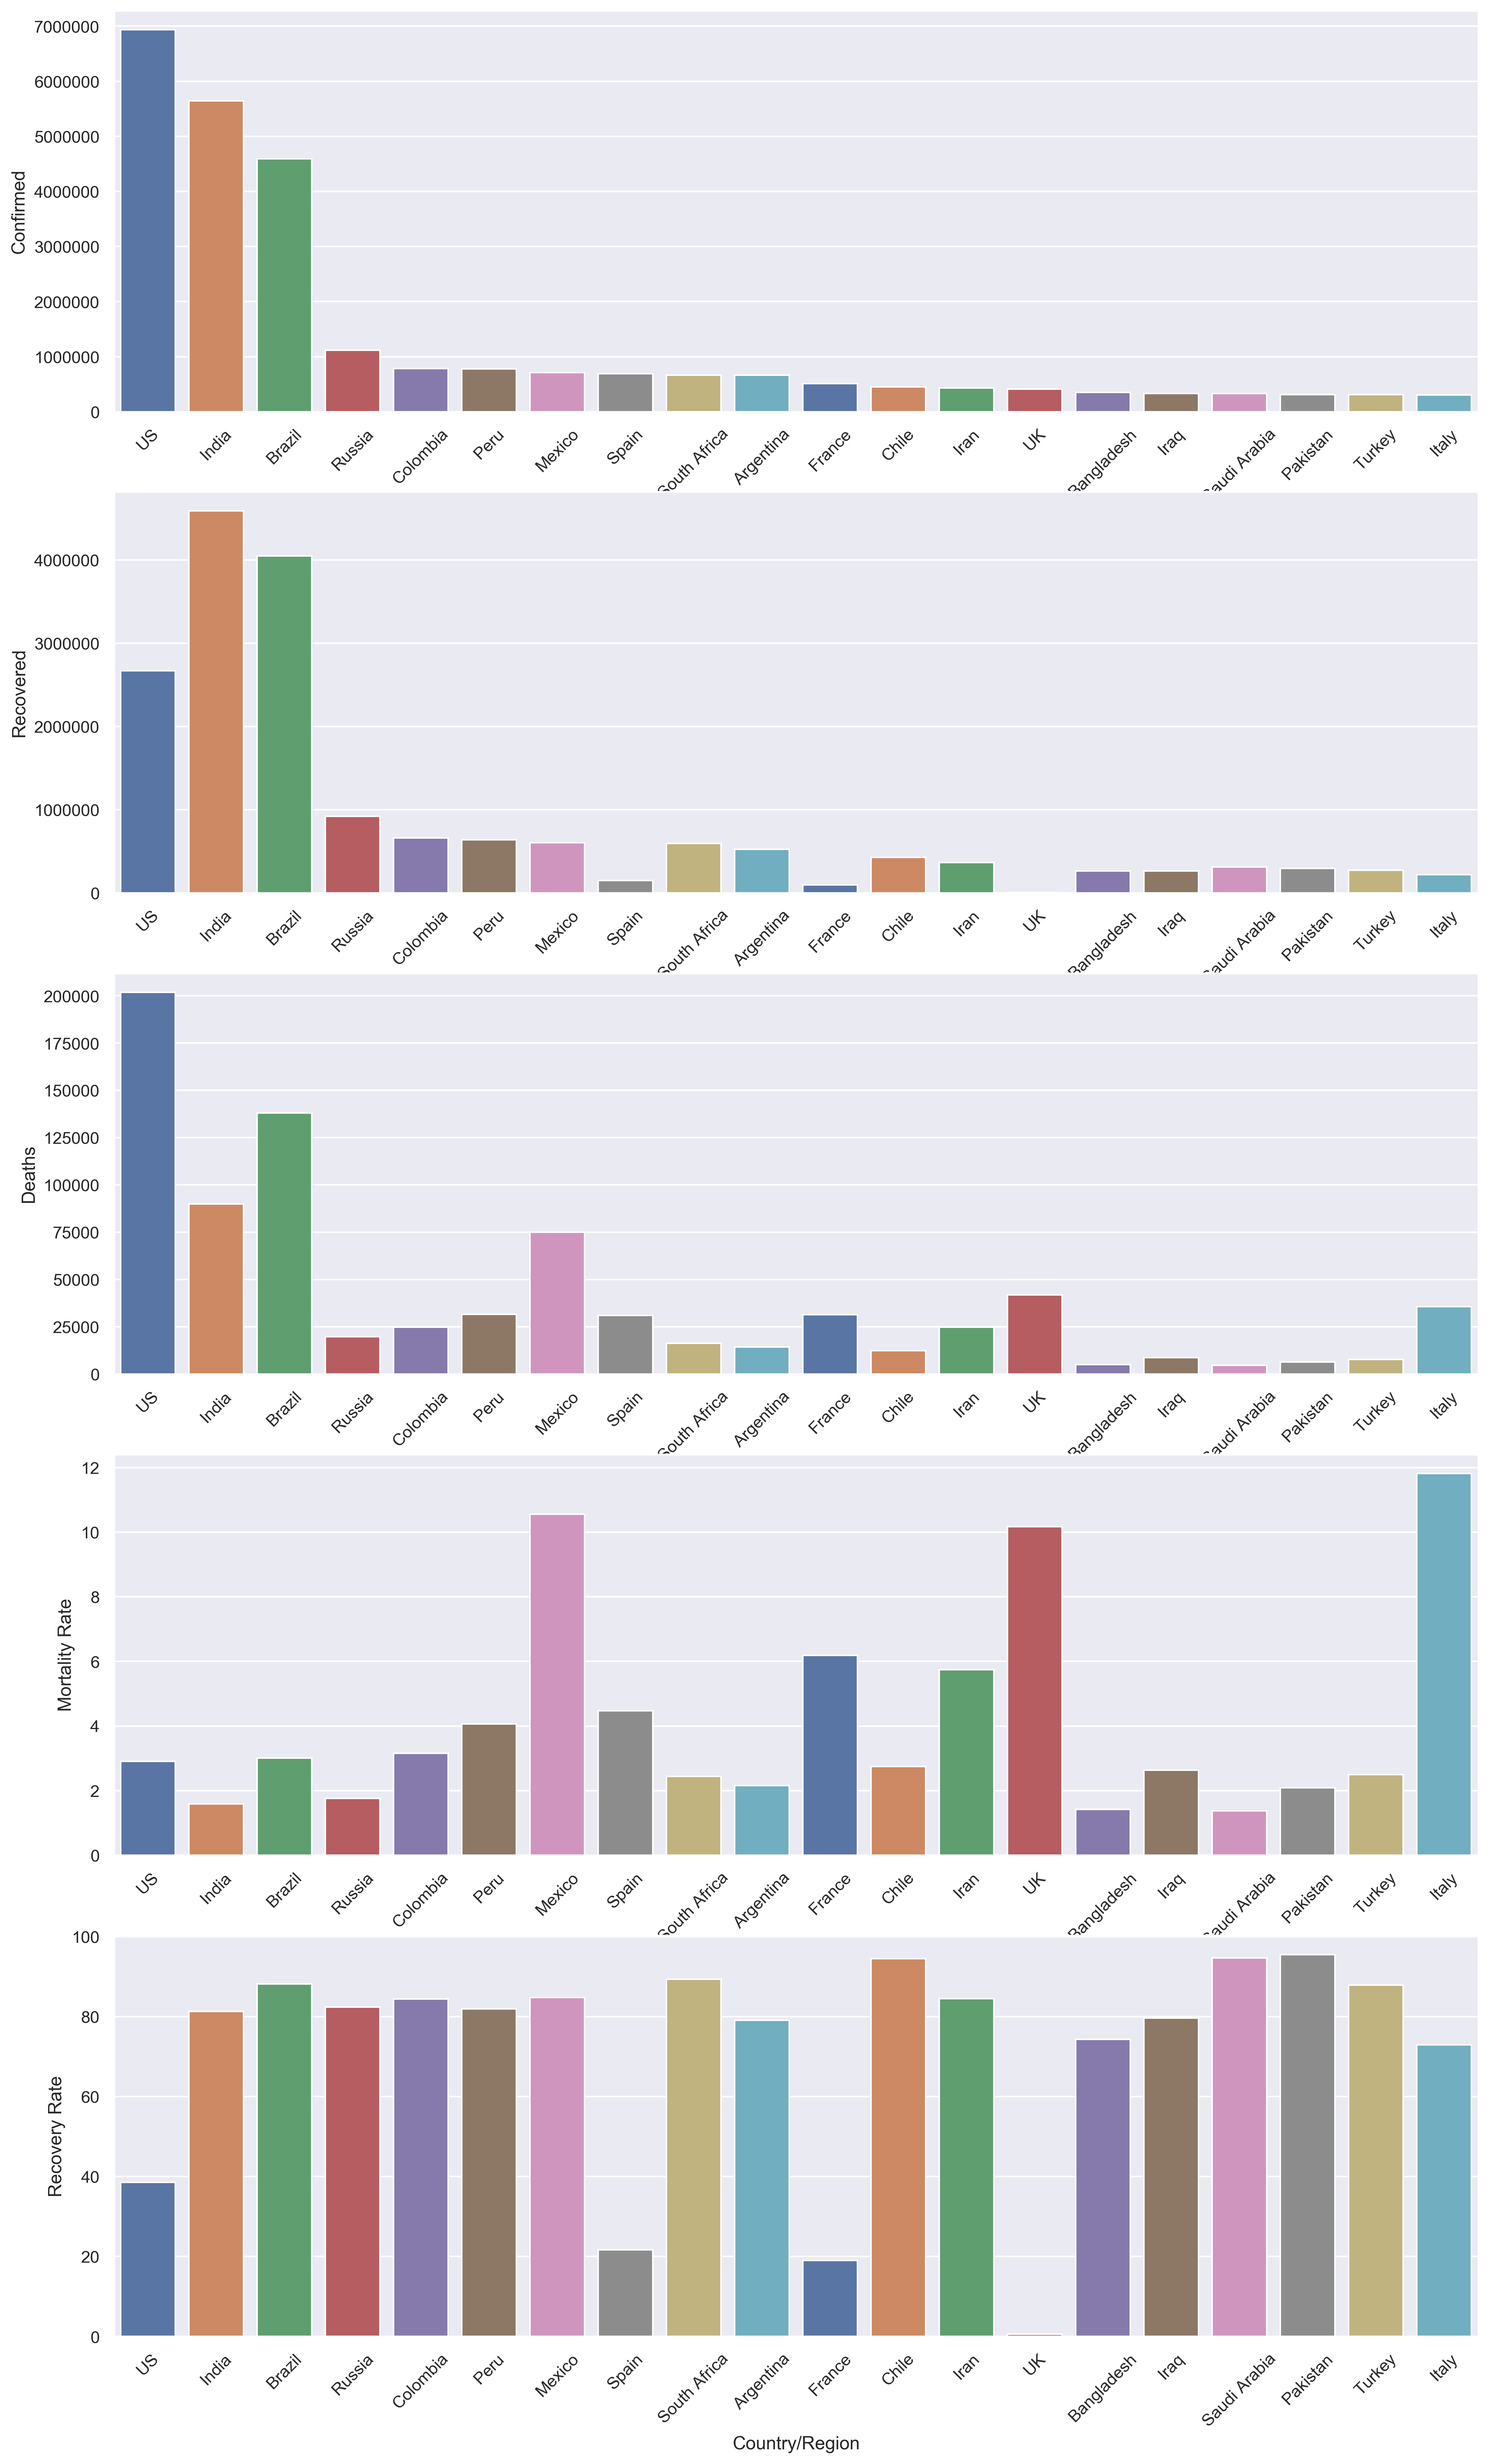

In [40]:
fig, ax = plt.subplots(5, 1, figsize = (16, 28), dpi=300)
sns.barplot(x=country_analysis_top20.index, y=country_analysis_top20['Confirmed'], ax=ax[0], palette="deep")
sns.barplot(x=country_analysis_top20.index, y=country_analysis_top20['Recovered'], ax=ax[1], palette="deep")
sns.barplot(x=country_analysis_top20.index, y=country_analysis_top20['Deaths'], ax=ax[2], palette="deep")
sns.barplot(x=country_analysis_top20.index, y=country_analysis_top20['Mortality Rate'], ax=ax[3], palette="deep")
sns.barplot(x=country_analysis_top20.index, y=country_analysis_top20['Recovery Rate'], ax=ax[4], palette="deep")
ax[0].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[1].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[2].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[3].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[4].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);

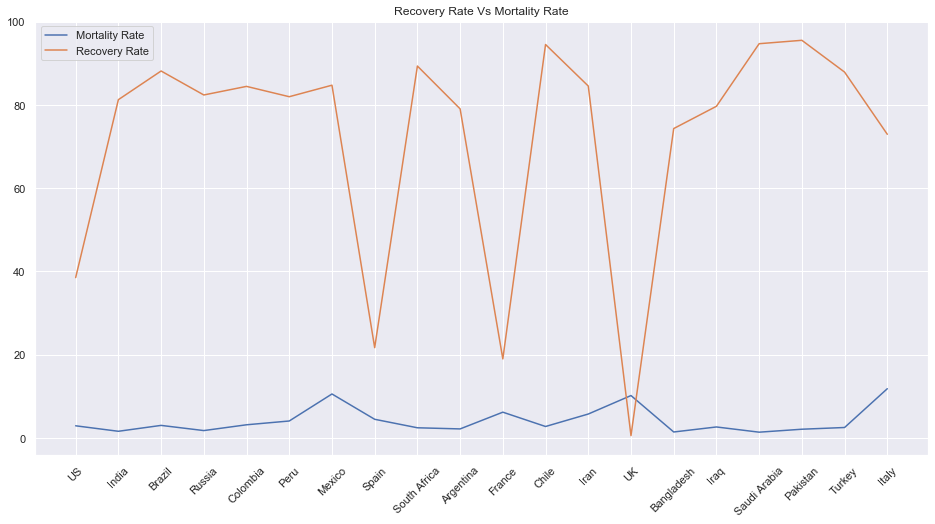

In [41]:
plt.figure(figsize=(16,8))
# sns.set()
plt.plot(country_analysis_top20['Mortality Rate'], label='Mortality Rate')
plt.plot(country_analysis_top20['Recovery Rate'], label='Recovery Rate')
# plt.xlabel('Country/Region')
# plt.ylabel('Rate')
plt.title('Recovery Rate Vs Mortality Rate')
plt.xticks(rotation=45)
plt.legend();

In [42]:
data_India = data[data['Country/Region']=='India'].groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Recovered':'sum','Deaths':'sum'})

In [43]:
data_India

Confirmed  Recovered   Deaths
ObservationDate                               
2020-01-30             1.0        0.0      0.0
2020-01-31             1.0        0.0      0.0
2020-02-01             1.0        0.0      0.0
2020-02-02             2.0        0.0      0.0
2020-02-03             3.0        0.0      0.0
...                    ...        ...      ...
2020-09-19       5308014.0  4208431.0  85619.0
2020-09-20       5400619.0  4303043.0  86752.0
2020-09-21       5487580.0  4396399.0  87882.0
2020-09-22       5562663.0  4497867.0  88935.0
2020-09-23       5646010.0  4587613.0  90020.0

[238 rows x 3 columns]

In [44]:
data_India = data_India.resample('W').mean()

In [45]:
print("Weekly Average increase in number of Confirmed cases India :- ", np.round(data_India['Confirmed'].diff().fillna(0).mean()))
print("Weekly Average increase in number Recovered cases India :- ", np.round(data_India['Recovered'].diff().fillna(0).mean()))
print("Weekly Average increase in number Death cases India :- ", np.round(data_India['Deaths'].diff().fillna(0).mean()))

Weekly Average increase in number of Confirmed cases India :-  159012.0
Weekly Average increase in number Recovered cases India :-  128399.0
Weekly Average increase in number Death cases India :-  2541.0


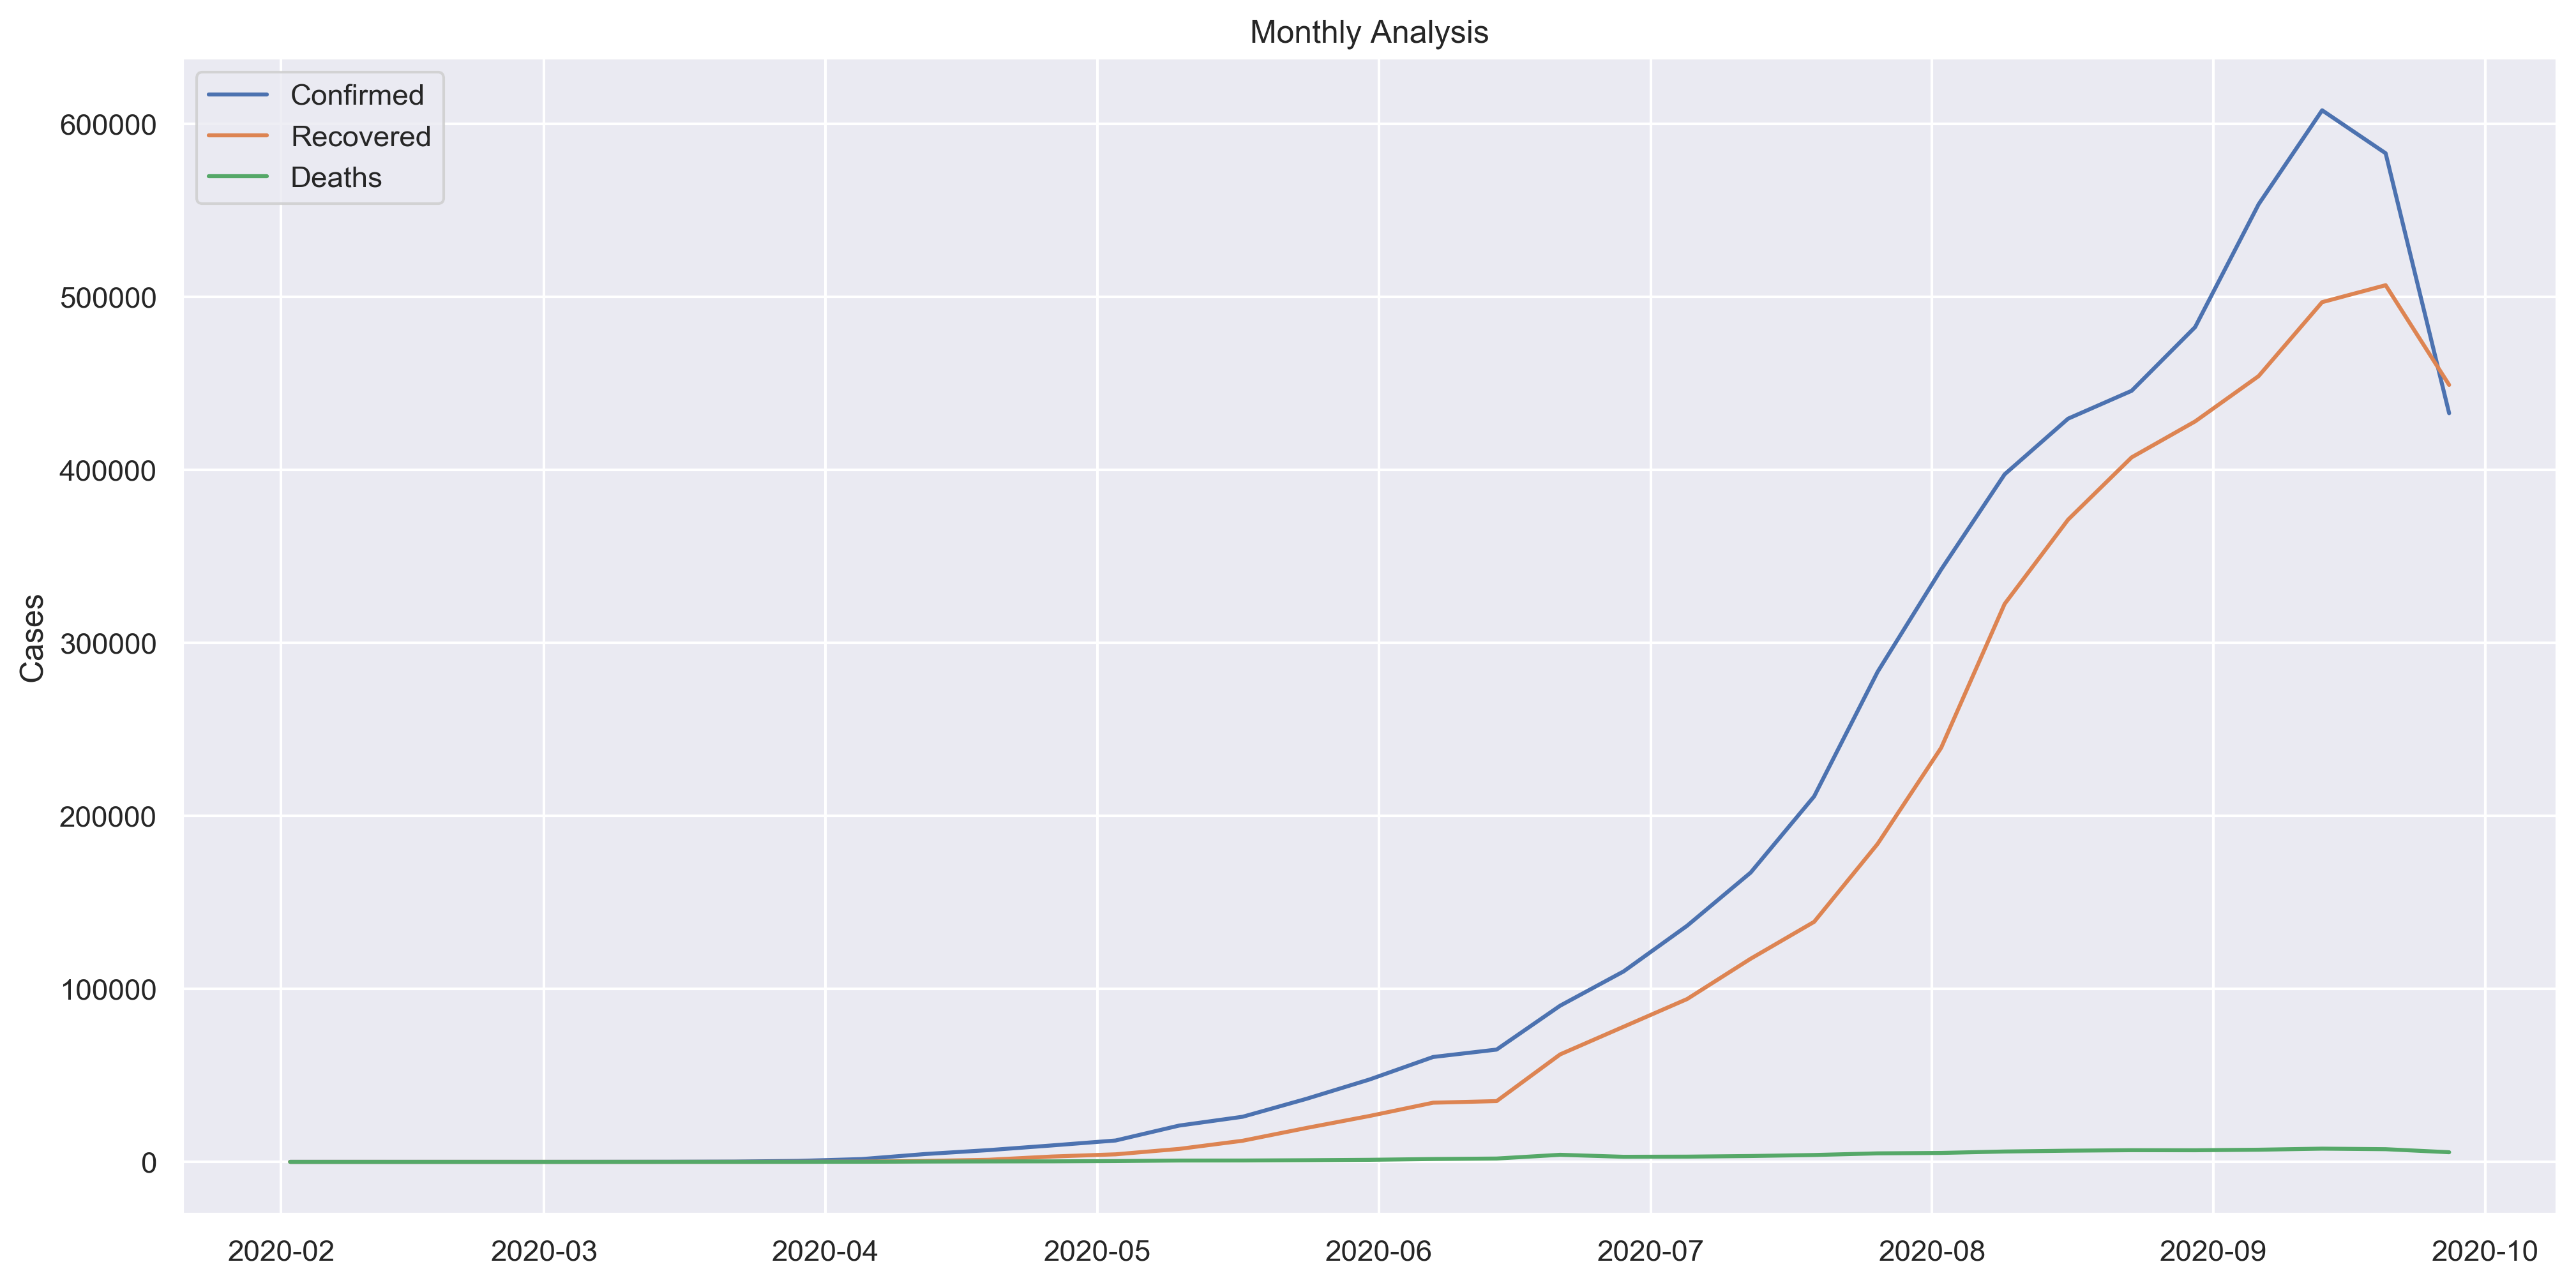

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8), dpi=300)
sns.lineplot(x=data_India.index.date, y=data_India['Confirmed'].diff().fillna(0), label='Confirmed',palette='rocket')
sns.lineplot(x=data_India.index.date, y=data_India['Recovered'].diff().fillna(0), label='Recovered',palette='rocket')
sns.lineplot(x=data_India.index.date, y=data_India['Deaths'].diff().fillna(0), label='Deaths',palette='rocket')
sns.set()
ax.set_ylabel('Cases')
plt.title('Monthly Analysis')
plt.legend()
# plt.legend(['Confirmed','Recovered','Deaths','Active','Closed'])
plt.show()


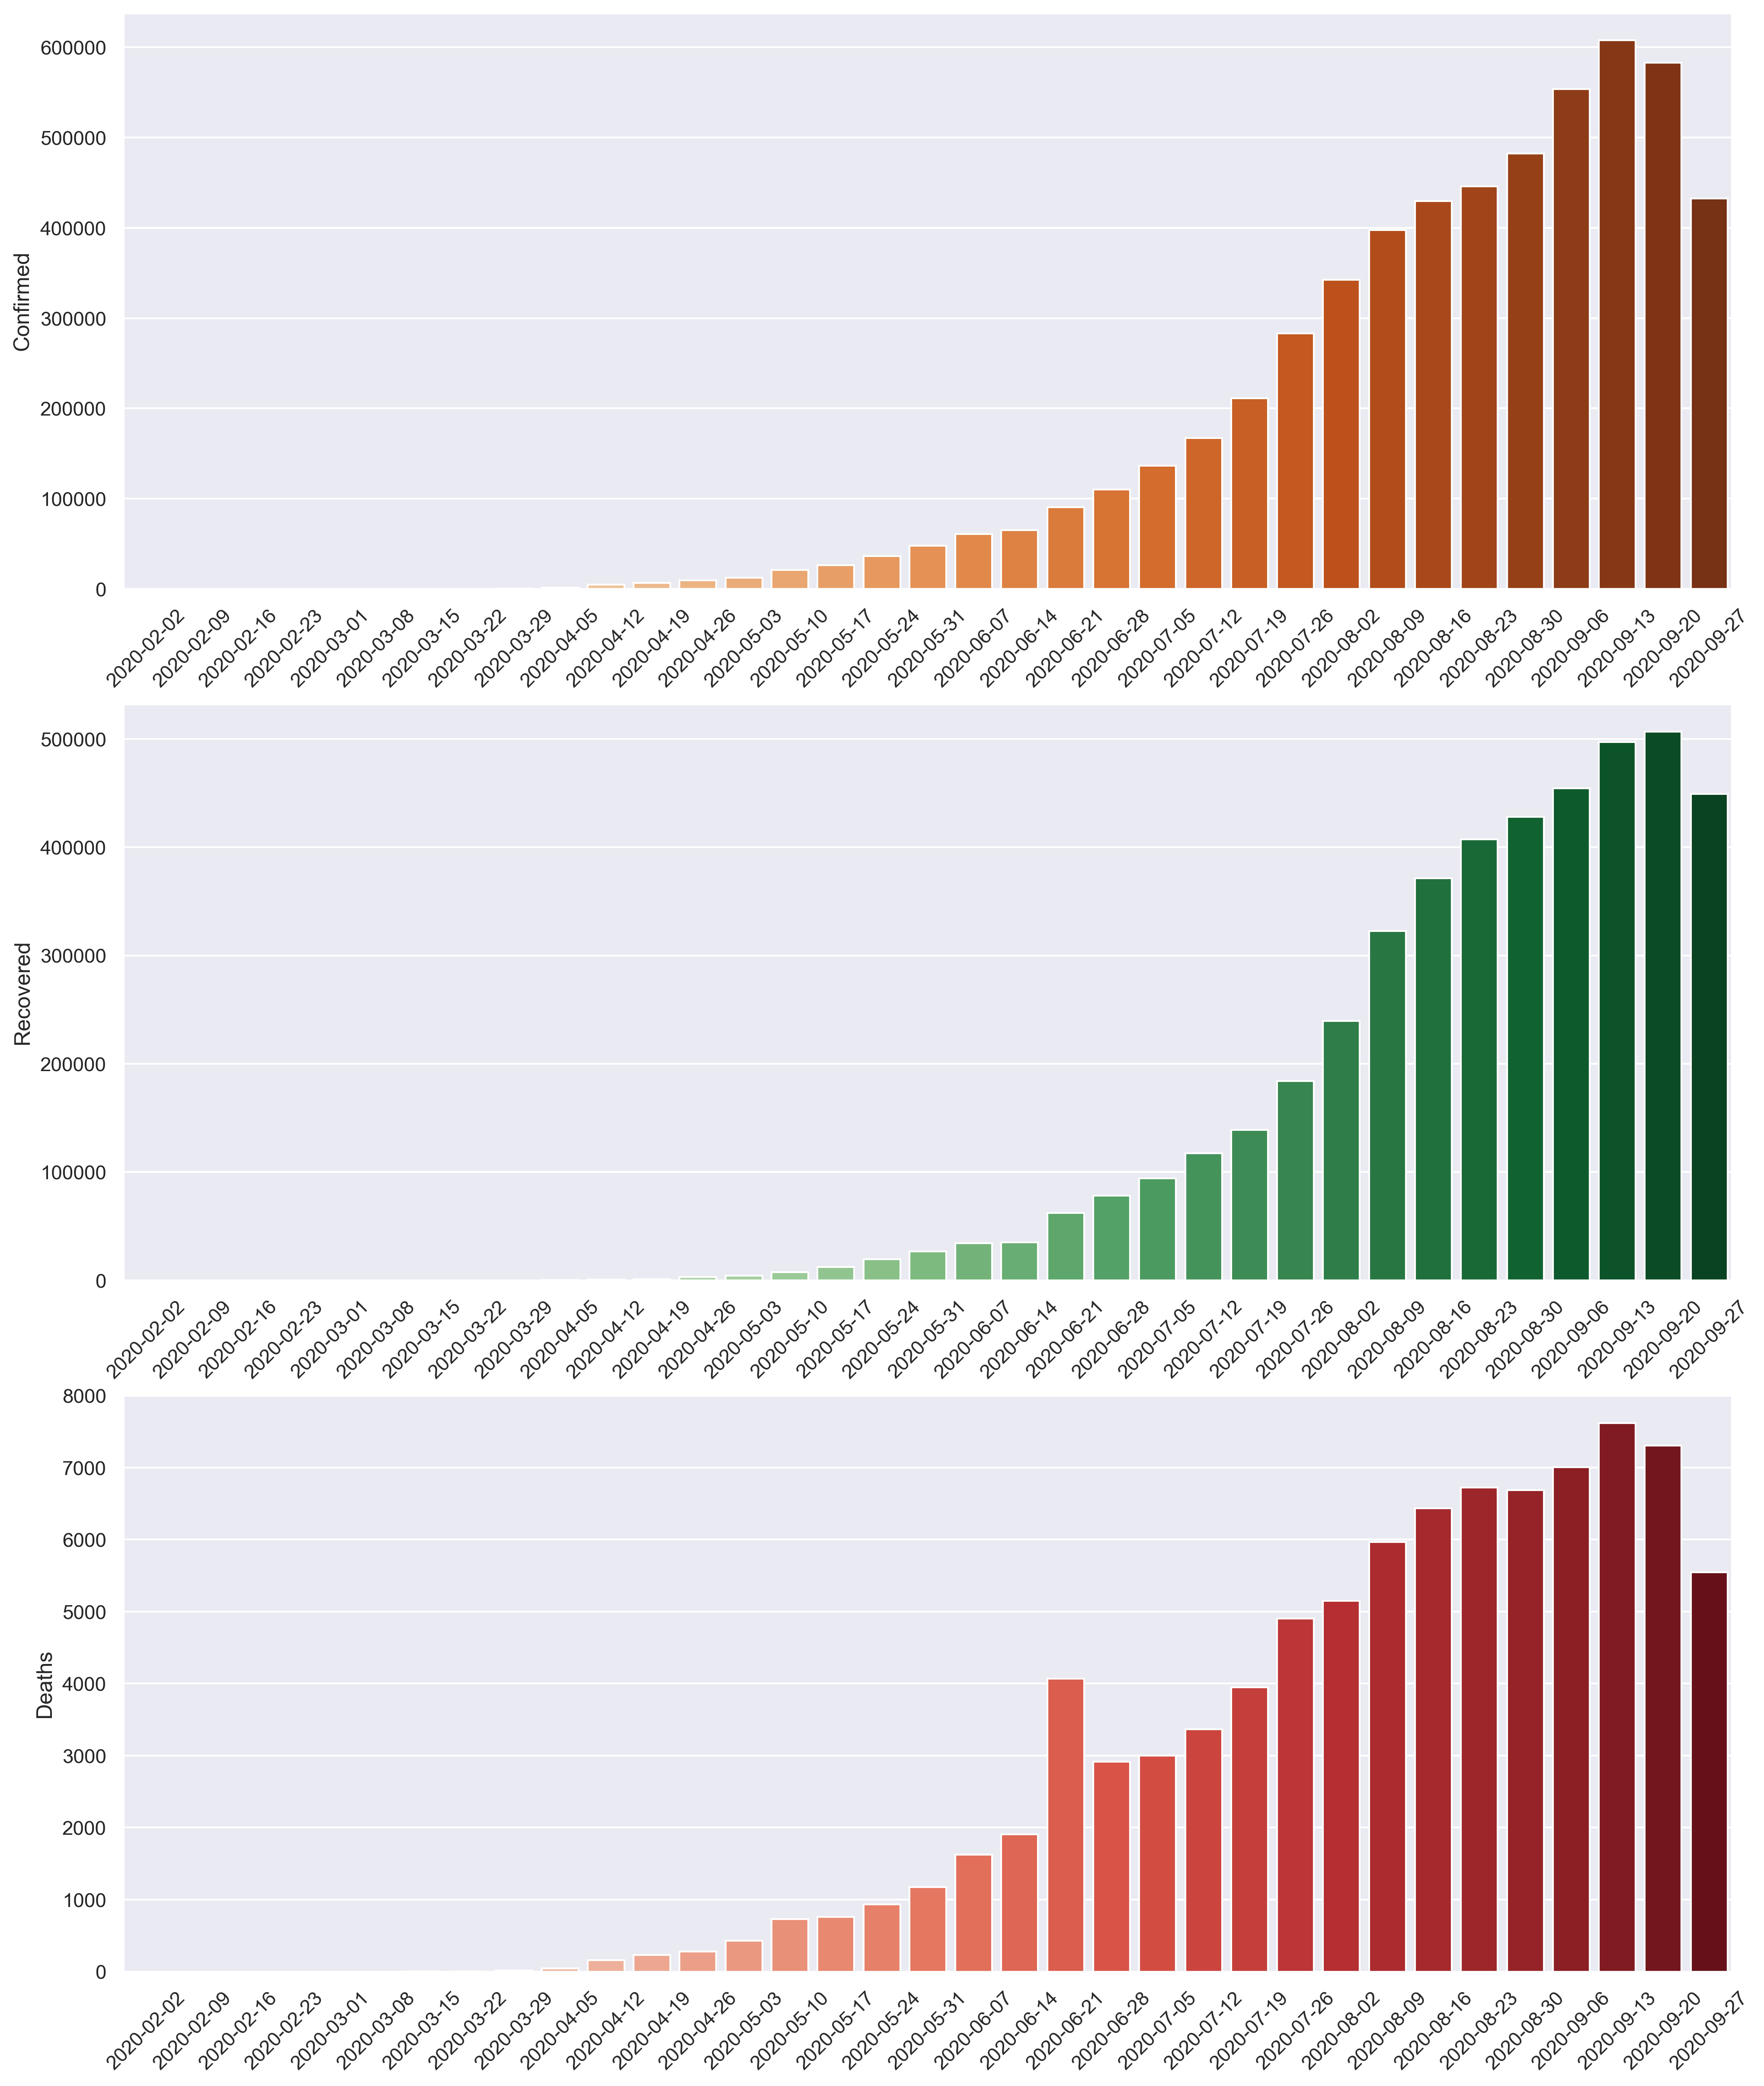

In [47]:
fig, ax = plt.subplots(3, 1, figsize = (16, 20), dpi=300)
sns.barplot(x=data_India.index.date, y=data_India['Confirmed'].diff().fillna(0), ax=ax[0], palette="Oranges")
sns.barplot(x=data_India.index.date, y=data_India['Recovered'].diff().fillna(0), ax=ax[1], palette="Greens")
sns.barplot(x=data_India.index.date, y=data_India['Deaths'].diff().fillna(0), ax=ax[2], palette="Reds")
ax[0].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[1].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[2].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);

In [48]:
data_India_state = data[(data['Country/Region']=='India') & (data['ObservationDate']==data['ObservationDate'].max())].groupby(['Province/State']).agg({'Confirmed':'sum', 'Recovered':'sum','Deaths':'sum'})

In [49]:
data_India_state

Confirmed  Recovered   Deaths
Province/State                                                         
Andaman and Nicobar Islands                  3691.0     3479.0     52.0
Andhra Pradesh                             639302.0   562376.0   5461.0
Arunachal Pradesh                            7844.0     5778.0     14.0
Assam                                      161393.0   130950.0    586.0
Bihar                                      171255.0   157454.0    873.0
Chandigarh                                  10546.0     7794.0    130.0
Chhattisgarh                                90917.0    52001.0    718.0
Dadra and Nagar Haveli and Daman and Diu     2944.0     2744.0      2.0
Delhi                                      253075.0   216401.0   5051.0
Goa                                         29343.0    23462.0    368.0
Gujarat                                    126007.0   106285.0   3352.0
Haryana                                    114870.0    93776.0   1206.0
Himachal Pradesh                            12769.0     8511.0    134.0
Jammu and Kashmir                           66261.0    43734.0   1042.0
Jharkhand                                   73948.0    60027.0    641.0
Karnataka                                  533850.0   432450.0   8228.0
Kerala                                     142756.0   101731.0    572.0
Ladakh                                       3887.0     2809.0     50.0
Lakshadweep                                     0.0        0.0      0.0
Madhya Pradesh                             110711.0    86030.0   2035.0
Maharashtra                               1242770.0   936554.0  33407.0
Manipur                                      9280.0     6887.0     60.0
Meghalaya                                    4791.0     2706.0     38.0
Mizoram                                      1713.0     1023.0      0.0
Nagaland                                     5604.0     4517.0     15.0
Odisha                                     188311.0   153213.0    721.0
Puducherry                                  23684.0    18454.0    473.0
Punjab                                     101341.0    77127.0   2926.0
Rajasthan                                  118793.0    98812.0   1367.0
Sikkim                                       2594.0     2009.0     29.0
Tamil Nadu                                 552674.0   497377.0   8947.0
Telangana                                  177070.0   146135.0   1062.0
Tripura                                     23338.0    16486.0    253.0
Unknown                                         0.0        0.0      0.0
Uttar Pradesh                              364543.0   296183.0   5212.0
Uttarakhand                                 42651.0    30308.0    512.0
West Bengal                                231484.0   202030.0   4483.0

In [50]:
data_India_state = data_India_state.sort_values(by='Confirmed', ascending=False)[:20]

In [51]:
data_India_state['Mortality rate'] = (data_India_state['Deaths']/data_India_state['Confirmed'])*100
data_India_state['Recovery rate'] = (data_India_state['Recovered']/data_India_state['Confirmed'])*100

In [52]:
data_India_state

Confirmed  Recovered   Deaths  Mortality rate  \
Province/State                                                     
Maharashtra        1242770.0   936554.0  33407.0        2.688108   
Andhra Pradesh      639302.0   562376.0   5461.0        0.854213   
Tamil Nadu          552674.0   497377.0   8947.0        1.618857   
Karnataka           533850.0   432450.0   8228.0        1.541257   
Uttar Pradesh       364543.0   296183.0   5212.0        1.429735   
Delhi               253075.0   216401.0   5051.0        1.995851   
West Bengal         231484.0   202030.0   4483.0        1.936635   
Odisha              188311.0   153213.0    721.0        0.382877   
Telangana           177070.0   146135.0   1062.0        0.599763   
Bihar               171255.0   157454.0    873.0        0.509766   
Assam               161393.0   130950.0    586.0        0.363089   
Kerala              142756.0   101731.0    572.0        0.400684   
Gujarat             126007.0   106285.0   3352.0        2.660170   
Rajasthan           118793.0    98812.0   1367.0        1.150741   
Haryana             114870.0    93776.0   1206.0        1.049882   
Madhya Pradesh      110711.0    86030.0   2035.0        1.838119   
Punjab              101341.0    77127.0   2926.0        2.887282   
Chhattisgarh         90917.0    52001.0    718.0        0.789731   
Jharkhand            73948.0    60027.0    641.0        0.866825   
Jammu and Kashmir    66261.0    43734.0   1042.0        1.572569   

                   Recovery rate  
Province/State                    
Maharashtra            75.360203  
Andhra Pradesh         87.967189  
Tamil Nadu             89.994644  
Karnataka              81.005901  
Uttar Pradesh          81.247754  
Delhi                  85.508644  
West Bengal            87.276010  
Odisha                 81.361684  
Telangana              82.529508  
Bihar                  91.941257  
Assam                  81.137348  
Kerala                 71.262154  
Gujarat                84.348489  
Rajasthan              83.179985  
Haryana                81.636633  
Madhya Pradesh         77.706822  
Punjab                 76.106413  
Chhattisgarh           57.196124  
Jharkhand              81.174609  
Jammu and Kashmir      66.002626

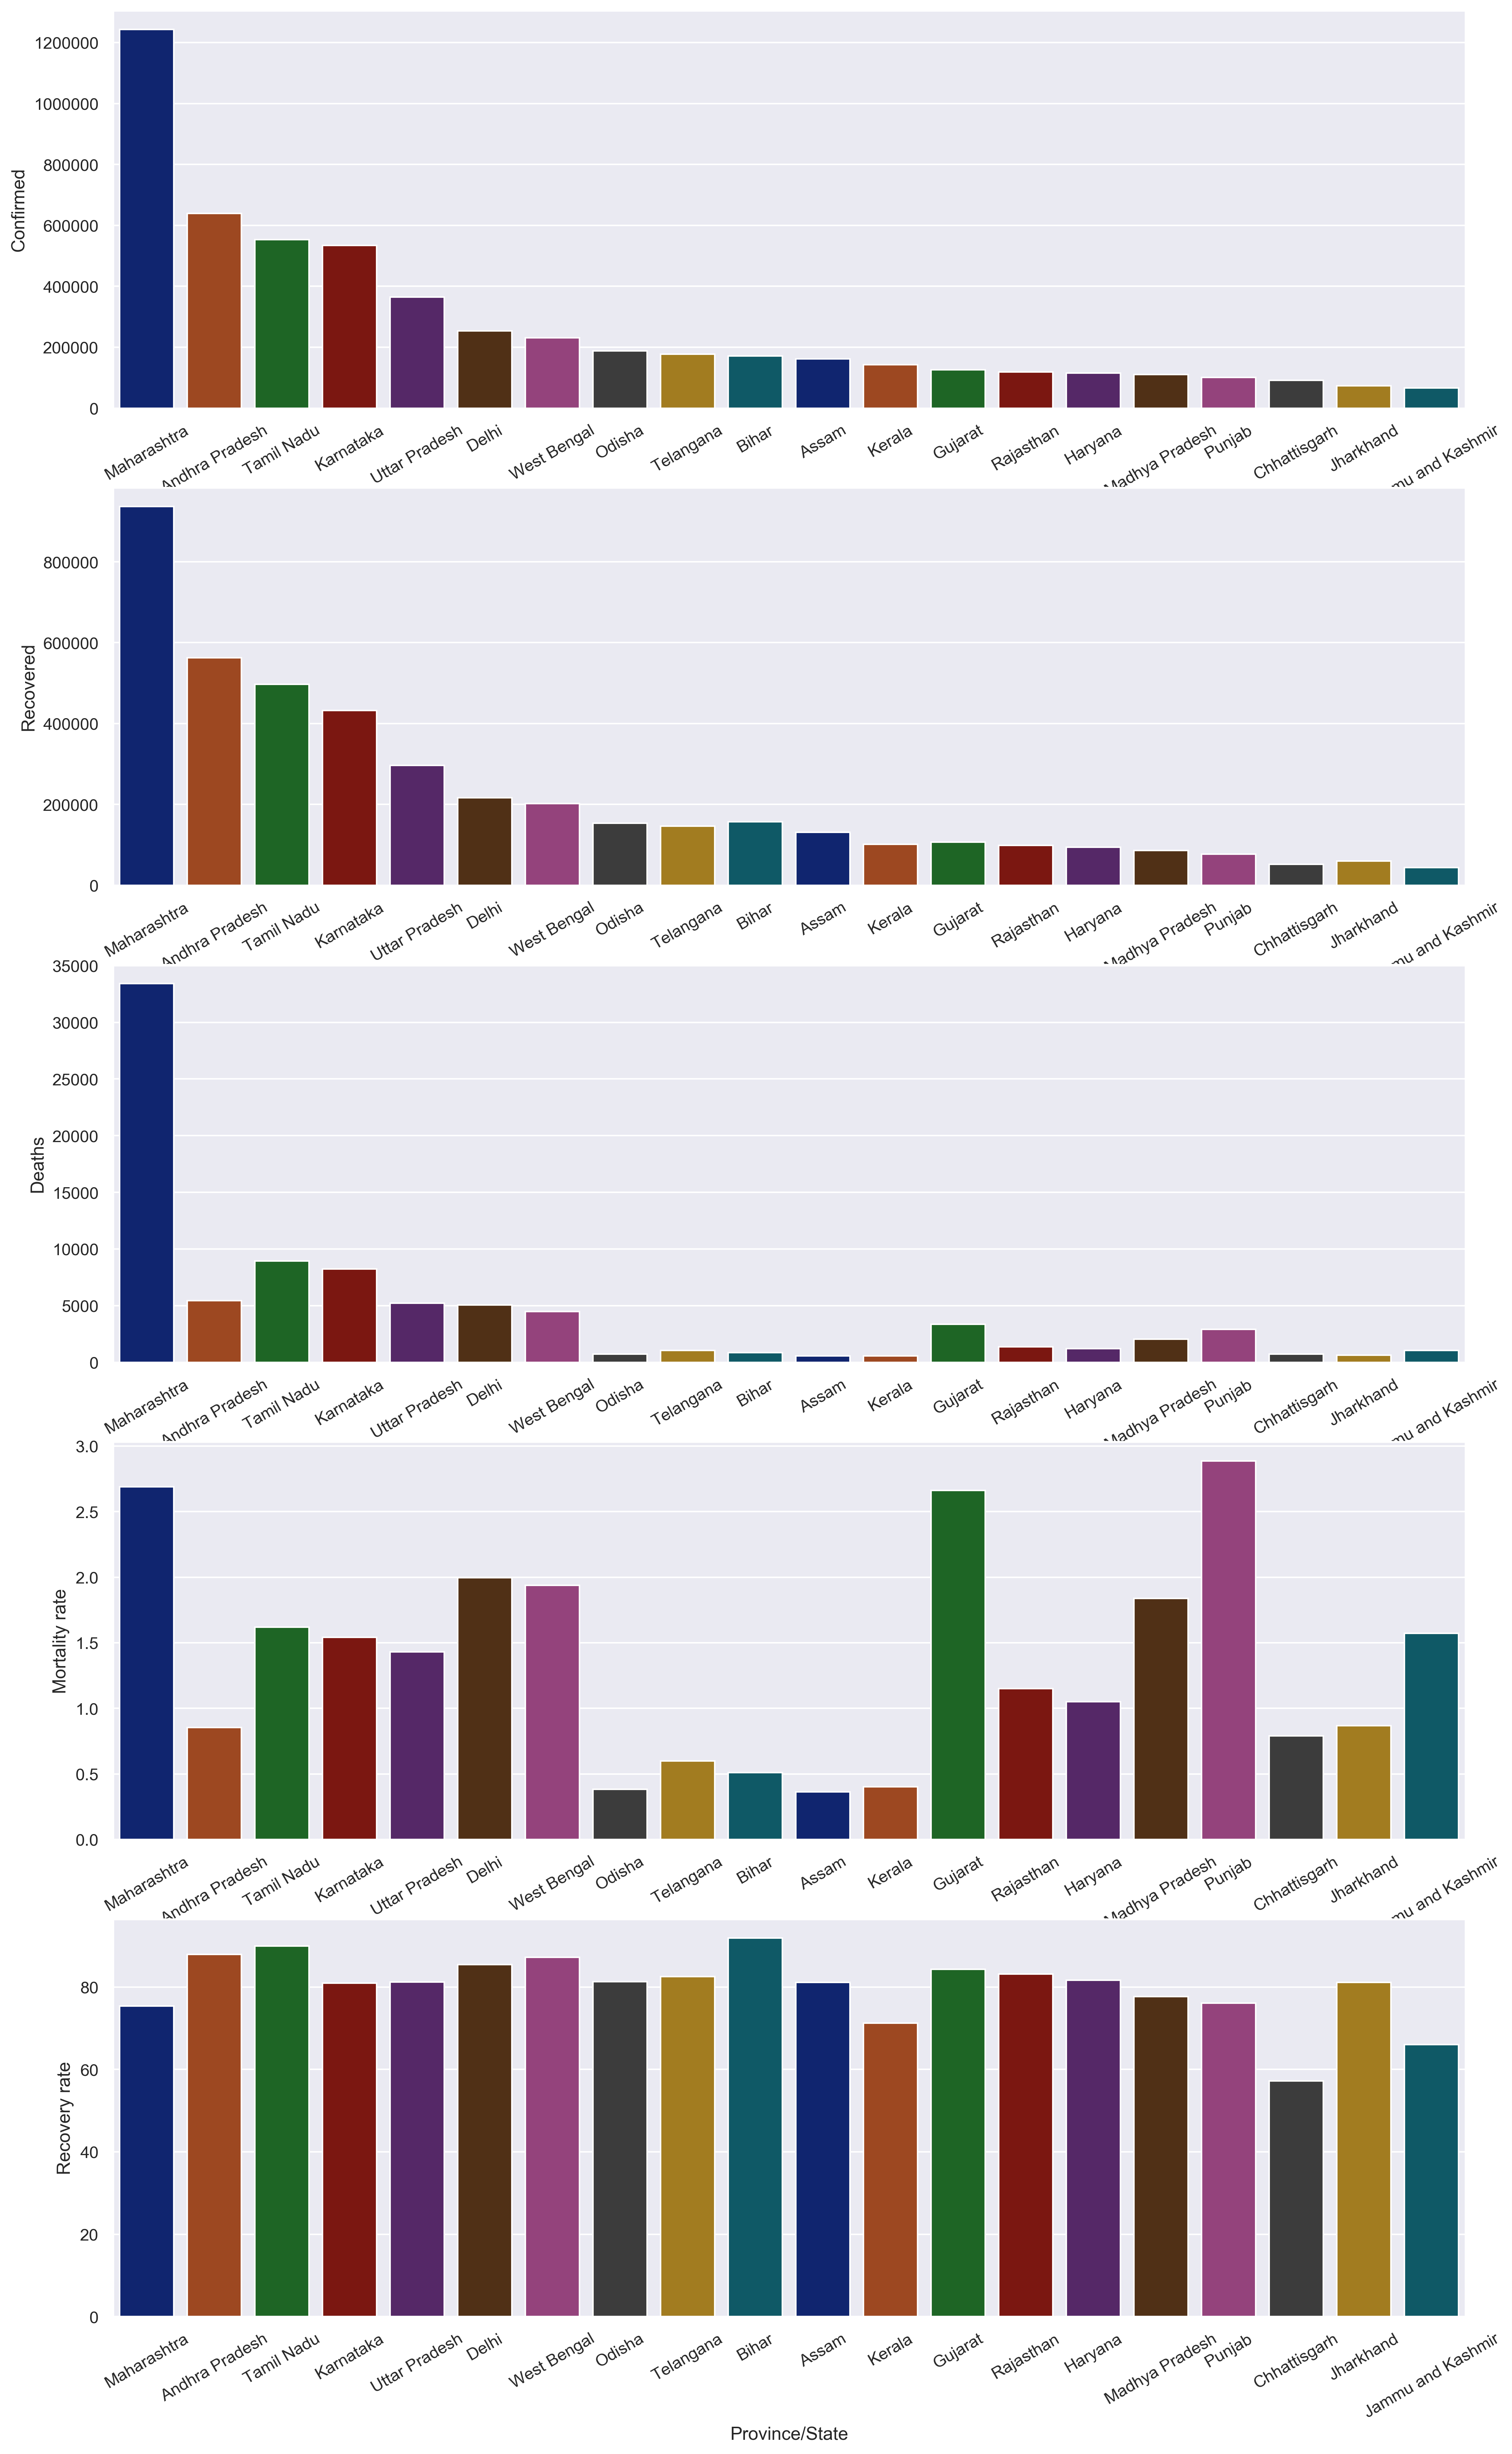

In [53]:
fig, ax = plt.subplots(5, 1, figsize = (16, 28), dpi=300)
sns.barplot(x=data_India_state.index, y=data_India_state['Confirmed'], ax=ax[0], palette="dark")
sns.barplot(x=data_India_state.index, y=data_India_state['Recovered'], ax=ax[1], palette="dark")
sns.barplot(x=data_India_state.index, y=data_India_state['Deaths'], ax=ax[2], palette="dark")
sns.barplot(x=data_India_state.index, y=data_India_state['Mortality rate'], ax=ax[3], palette="dark")
sns.barplot(x=data_India_state.index, y=data_India_state['Recovery rate'], ax=ax[4], palette="dark")
ax[0].set_xticklabels(ax[0].get_xticklabels() ,rotation=30);
ax[1].set_xticklabels(ax[0].get_xticklabels() ,rotation=30);
ax[2].set_xticklabels(ax[0].get_xticklabels() ,rotation=30);
ax[3].set_xticklabels(ax[0].get_xticklabels() ,rotation=30);
ax[4].set_xticklabels(ax[0].get_xticklabels() ,rotation=30);

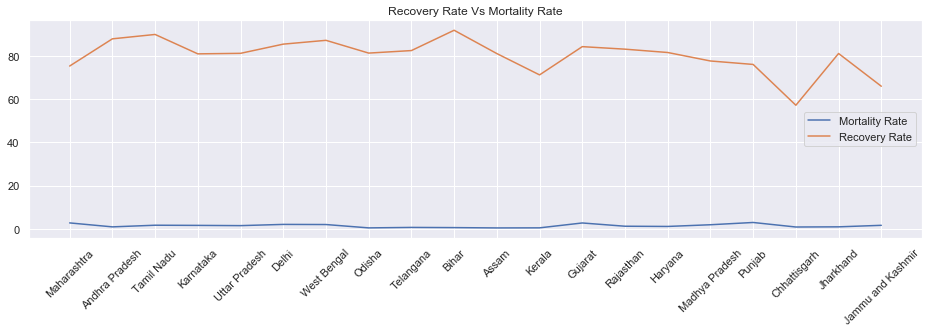

In [54]:
plt.figure(figsize=(16,4))
# sns.set()
plt.plot(data_India_state['Mortality rate'], label='Mortality Rate')
plt.plot(data_India_state['Recovery rate'], label='Recovery Rate')
# plt.xlabel('Country/Region')
# plt.ylabel('Rate')
plt.title('Recovery Rate Vs Mortality Rate')
plt.xticks(rotation=45)
plt.legend();

In [55]:
data_USA = data[data['Country/Region']=='US'].groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Recovered':'sum','Deaths':'sum'})
data_USA = data_USA.resample('W').mean()

In [56]:
data_USA

Confirmed     Recovered         Deaths
ObservationDate                                           
2020-01-26       2.200000e+00  0.000000e+00       0.000000
2020-02-02       6.000000e+00  0.000000e+00       0.000000
2020-02-09       1.171429e+01  4.285714e-01       0.000000
2020-02-16       1.400000e+01  3.000000e+00       0.000000
2020-02-23       2.357143e+01  3.857143e+00       0.000000
2020-03-01       6.185714e+01  6.285714e+00       0.285714
2020-03-08       2.612857e+02  7.857143e+00      12.571429
2020-03-15       1.844571e+03  1.028571e+01      41.428571
2020-03-22       1.585457e+04  8.085714e+01     212.714286
2020-03-29       8.729200e+04  8.565714e+02    1354.714286
2020-04-05       2.469264e+05  1.027857e+04    6092.428571
2020-04-12       4.616604e+05  2.619443e+04   16535.000000
2020-04-19       6.690613e+05  5.596657e+04   32385.428571
2020-04-26       8.735501e+05  8.736300e+04   49099.857143
2020-05-03       1.072006e+06  1.459394e+05   62510.142857
2020-05-10       1.256156e+06  1.985161e+05   74940.000000
2020-05-17       1.417577e+06  2.491789e+05   85560.142857
2020-05-24       1.576096e+06  3.204871e+05   94456.428571
2020-05-31       1.724357e+06  4.033176e+05  101447.571429
2020-06-07       1.877043e+06  4.836116e+05  108100.000000
2020-06-14       2.026043e+06  5.404266e+05  113654.428571
2020-06-21       2.195046e+06  5.996359e+05  118295.142857
2020-06-28       2.427116e+06  6.632500e+05  123485.857143
2020-07-05       2.739204e+06  7.898986e+05  128488.000000
2020-07-12       3.120037e+06  9.668917e+05  133061.285714
2020-07-19       3.571732e+06  1.086944e+06  138245.142857
2020-07-26       4.038171e+06  1.232161e+06  144191.857143
2020-08-02       4.488425e+06  1.407640e+06  151815.857143
2020-08-09       4.882377e+06  1.591822e+06  159609.285714
2020-08-16       5.251372e+06  1.766006e+06  167017.000000
2020-08-23       5.573816e+06  1.940589e+06  174039.285714
2020-08-30       5.868358e+06  2.096169e+06  180556.714286
2020-09-06       6.155687e+06  2.255405e+06  186572.142857
2020-09-13       6.404854e+06  2.398228e+06  191747.000000
2020-09-20       6.678189e+06  2.537169e+06  197433.000000
2020-09-27       6.895550e+06  2.644388e+06  200845.000000

In [57]:
print("Weekly Average increase in number of Confirmed cases USA :- ", np.round(data_USA['Confirmed'].diff().fillna(0).mean()))
print("Weekly Average increase in number Recovered cases USA :- ", np.round(data_USA['Recovered'].diff().fillna(0).mean()))
print("Weekly Average increase in number Death cases USA :- ", np.round(data_USA['Deaths'].diff().fillna(0).mean()))

Weekly Average increase in number of Confirmed cases USA :-  191543.0
Weekly Average increase in number Recovered cases USA :-  73455.0
Weekly Average increase in number Death cases USA :-  5579.0


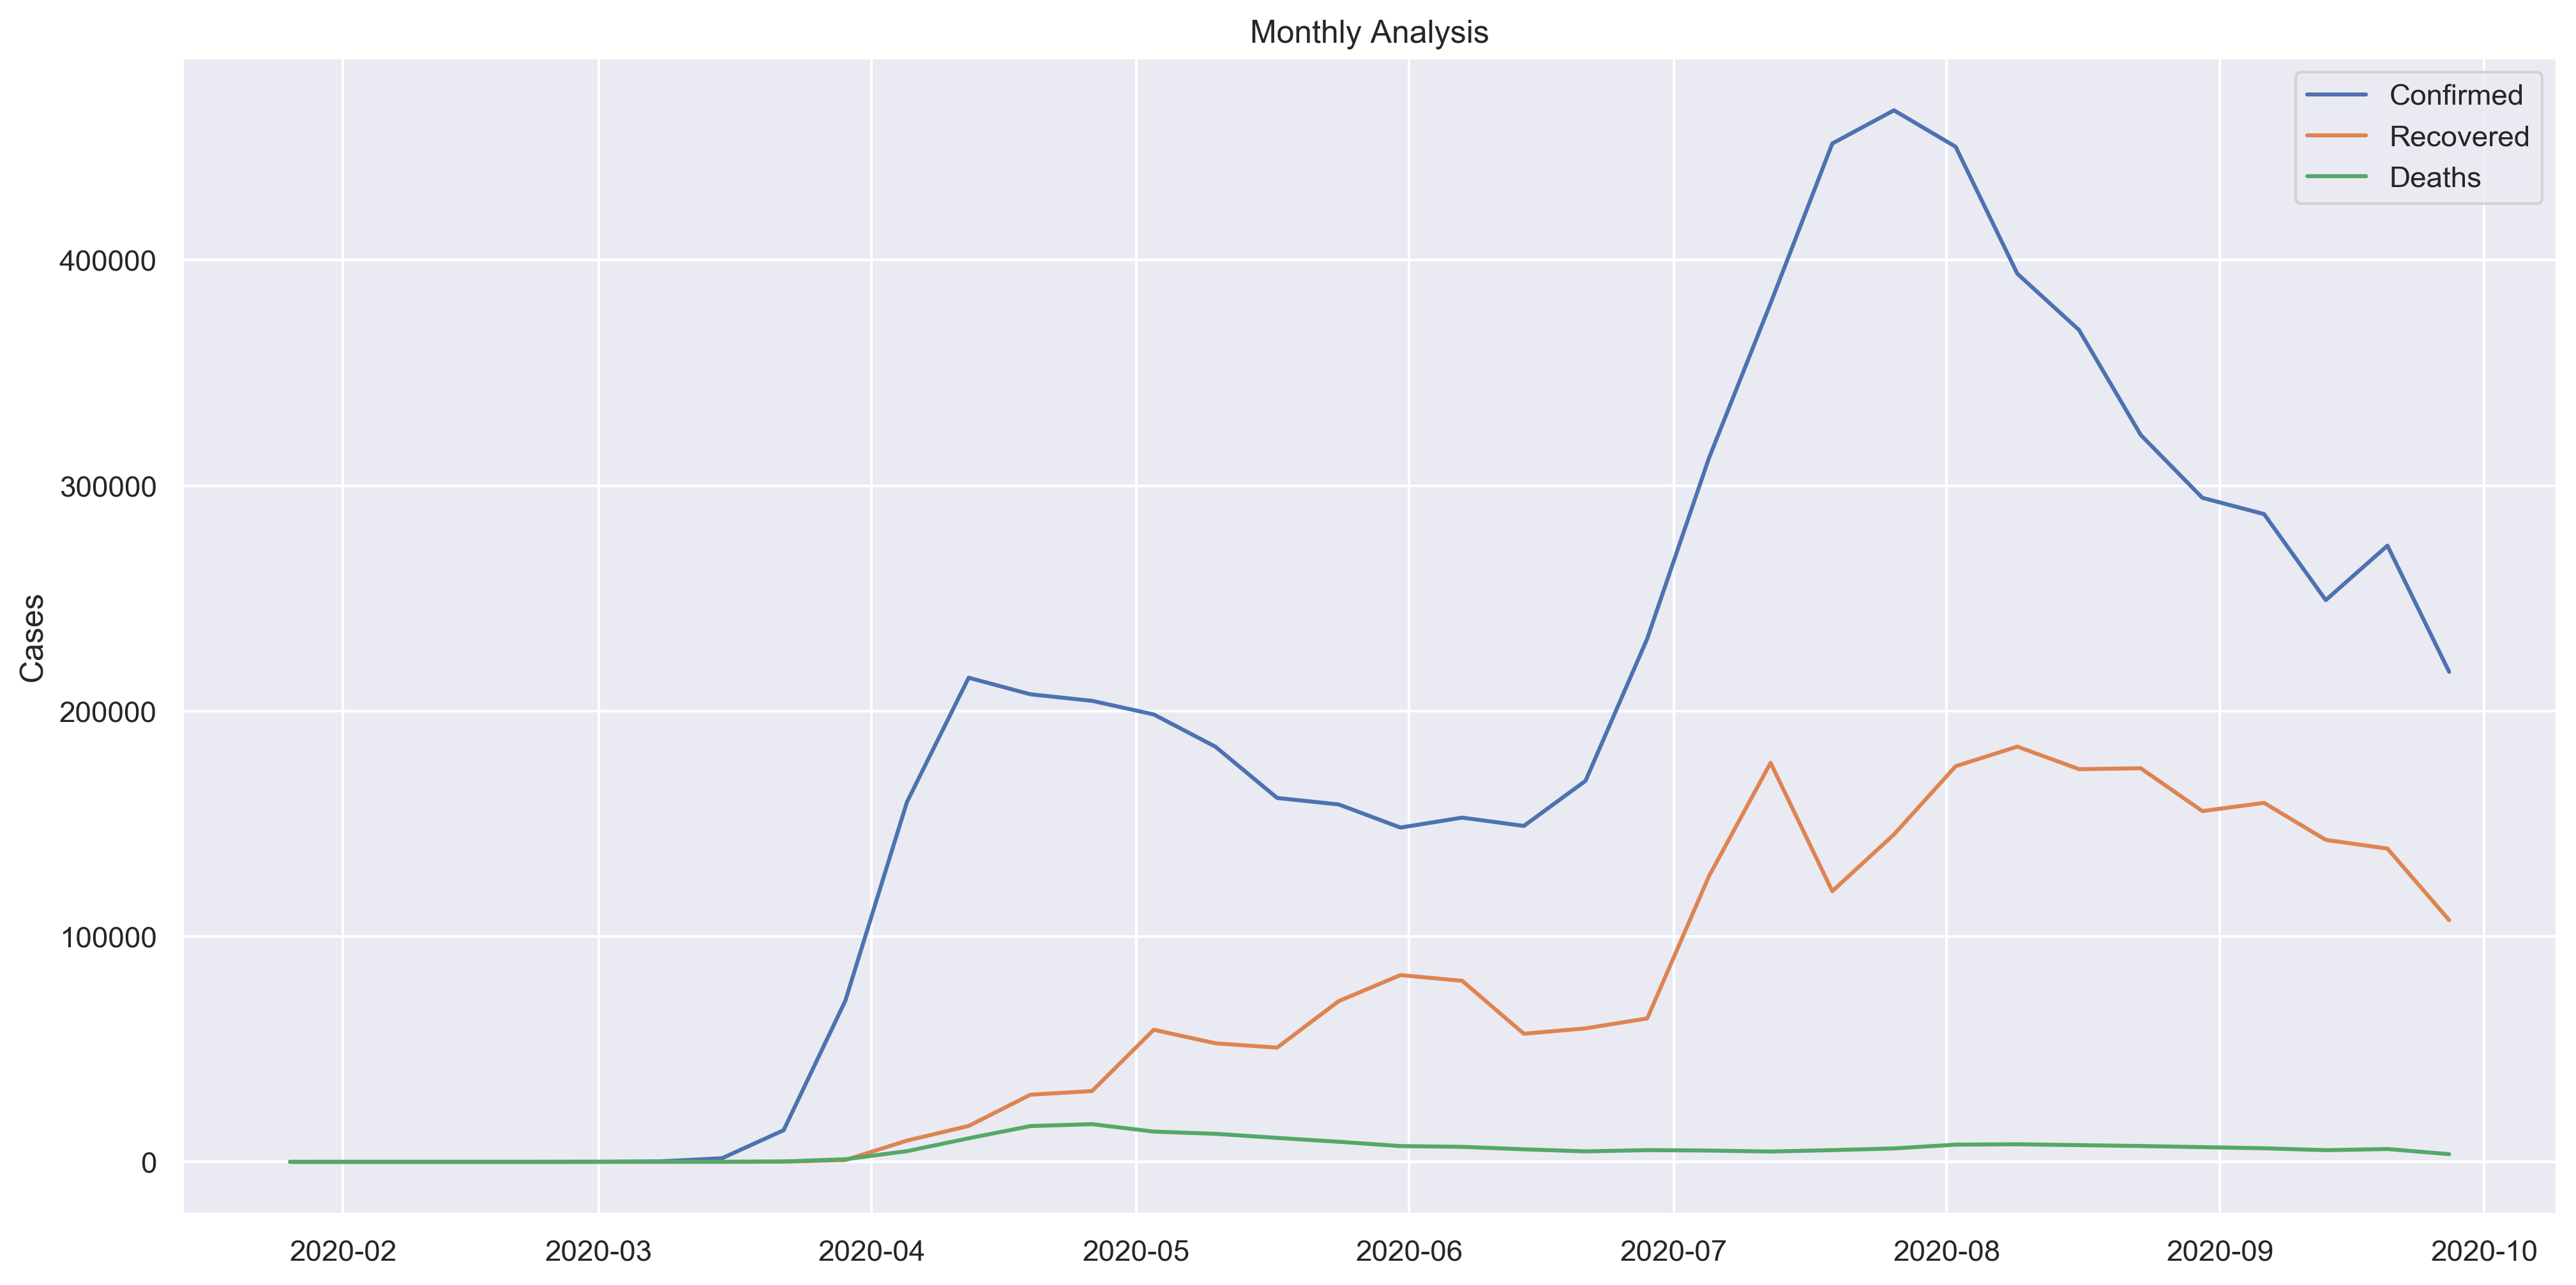

In [58]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8), dpi=300)
sns.lineplot(x=data_USA.index.date, y=data_USA['Confirmed'].diff().fillna(0), label='Confirmed',palette='rocket')
sns.lineplot(x=data_USA.index.date, y=data_USA['Recovered'].diff().fillna(0), label='Recovered',palette='rocket')
sns.lineplot(x=data_USA.index.date, y=data_USA['Deaths'].diff().fillna(0), label='Deaths',palette='rocket')
sns.set()
ax.set_ylabel('Cases')
plt.title('Monthly Analysis')
plt.legend()
# plt.legend(['Confirmed','Recovered','Deaths','Active','Closed'])
plt.show()


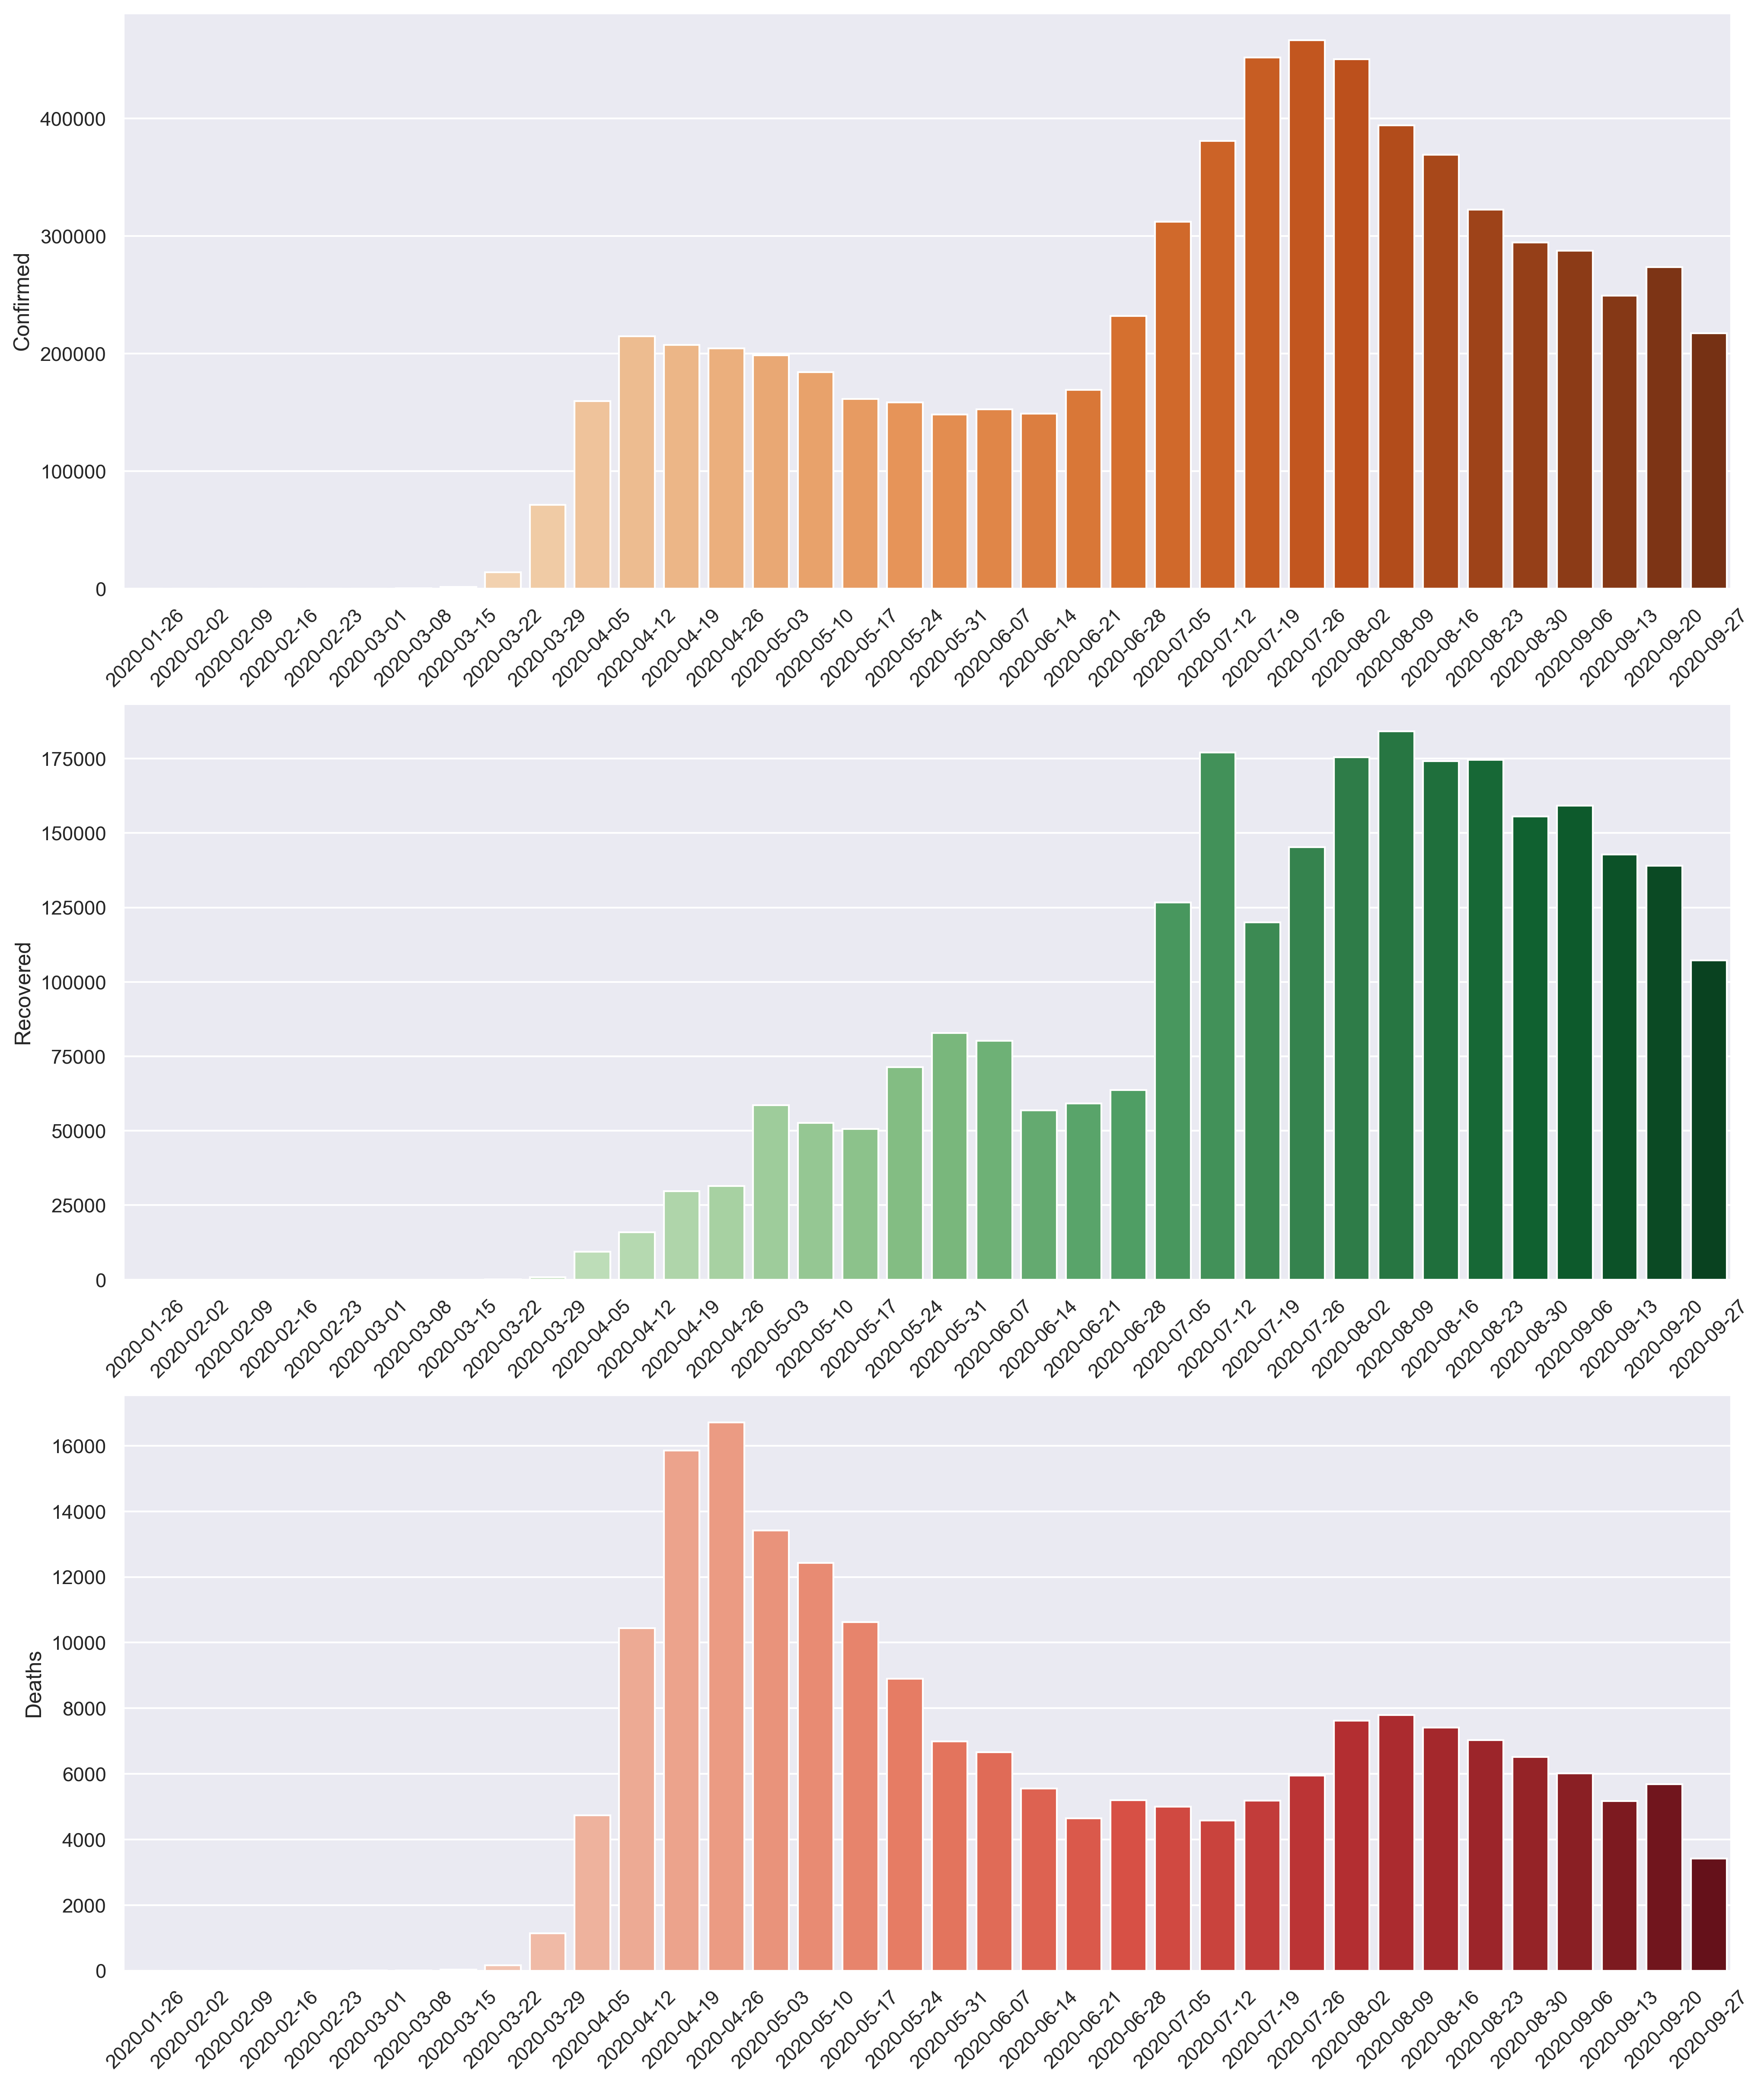

In [59]:
fig, ax = plt.subplots(3, 1, figsize = (16, 20), dpi=300)
sns.barplot(x=data_USA.index.date, y=data_USA['Confirmed'].diff().fillna(0), ax=ax[0], palette="Oranges")
sns.barplot(x=data_USA.index.date, y=data_USA['Recovered'].diff().fillna(0), ax=ax[1], palette="Greens")
sns.barplot(x=data_USA.index.date, y=data_USA['Deaths'].diff().fillna(0), ax=ax[2], palette="Reds")
ax[0].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[1].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);
ax[2].set_xticklabels(ax[0].get_xticklabels() ,rotation=45);

In [60]:
data_USA_state = data[(data['Country/Region']=='US') & (data['ObservationDate']==data['ObservationDate'].max())].groupby(['Province/State']).agg({'Confirmed':'sum', 'Recovered':'sum','Deaths':'sum'})

In [61]:
data_USA_state = data_USA_state.sort_values(by='Confirmed', ascending=False)[:20]
data_USA_state['Mortality rate'] = (data_USA_state['Deaths']/data_USA_state['Confirmed'])*100
data_USA_state['Recovery rate'] = (data_USA_state['Recovered']/data_USA_state['Confirmed'])*100

In [62]:
data_USA_state['Recovered'].sum()

0.0

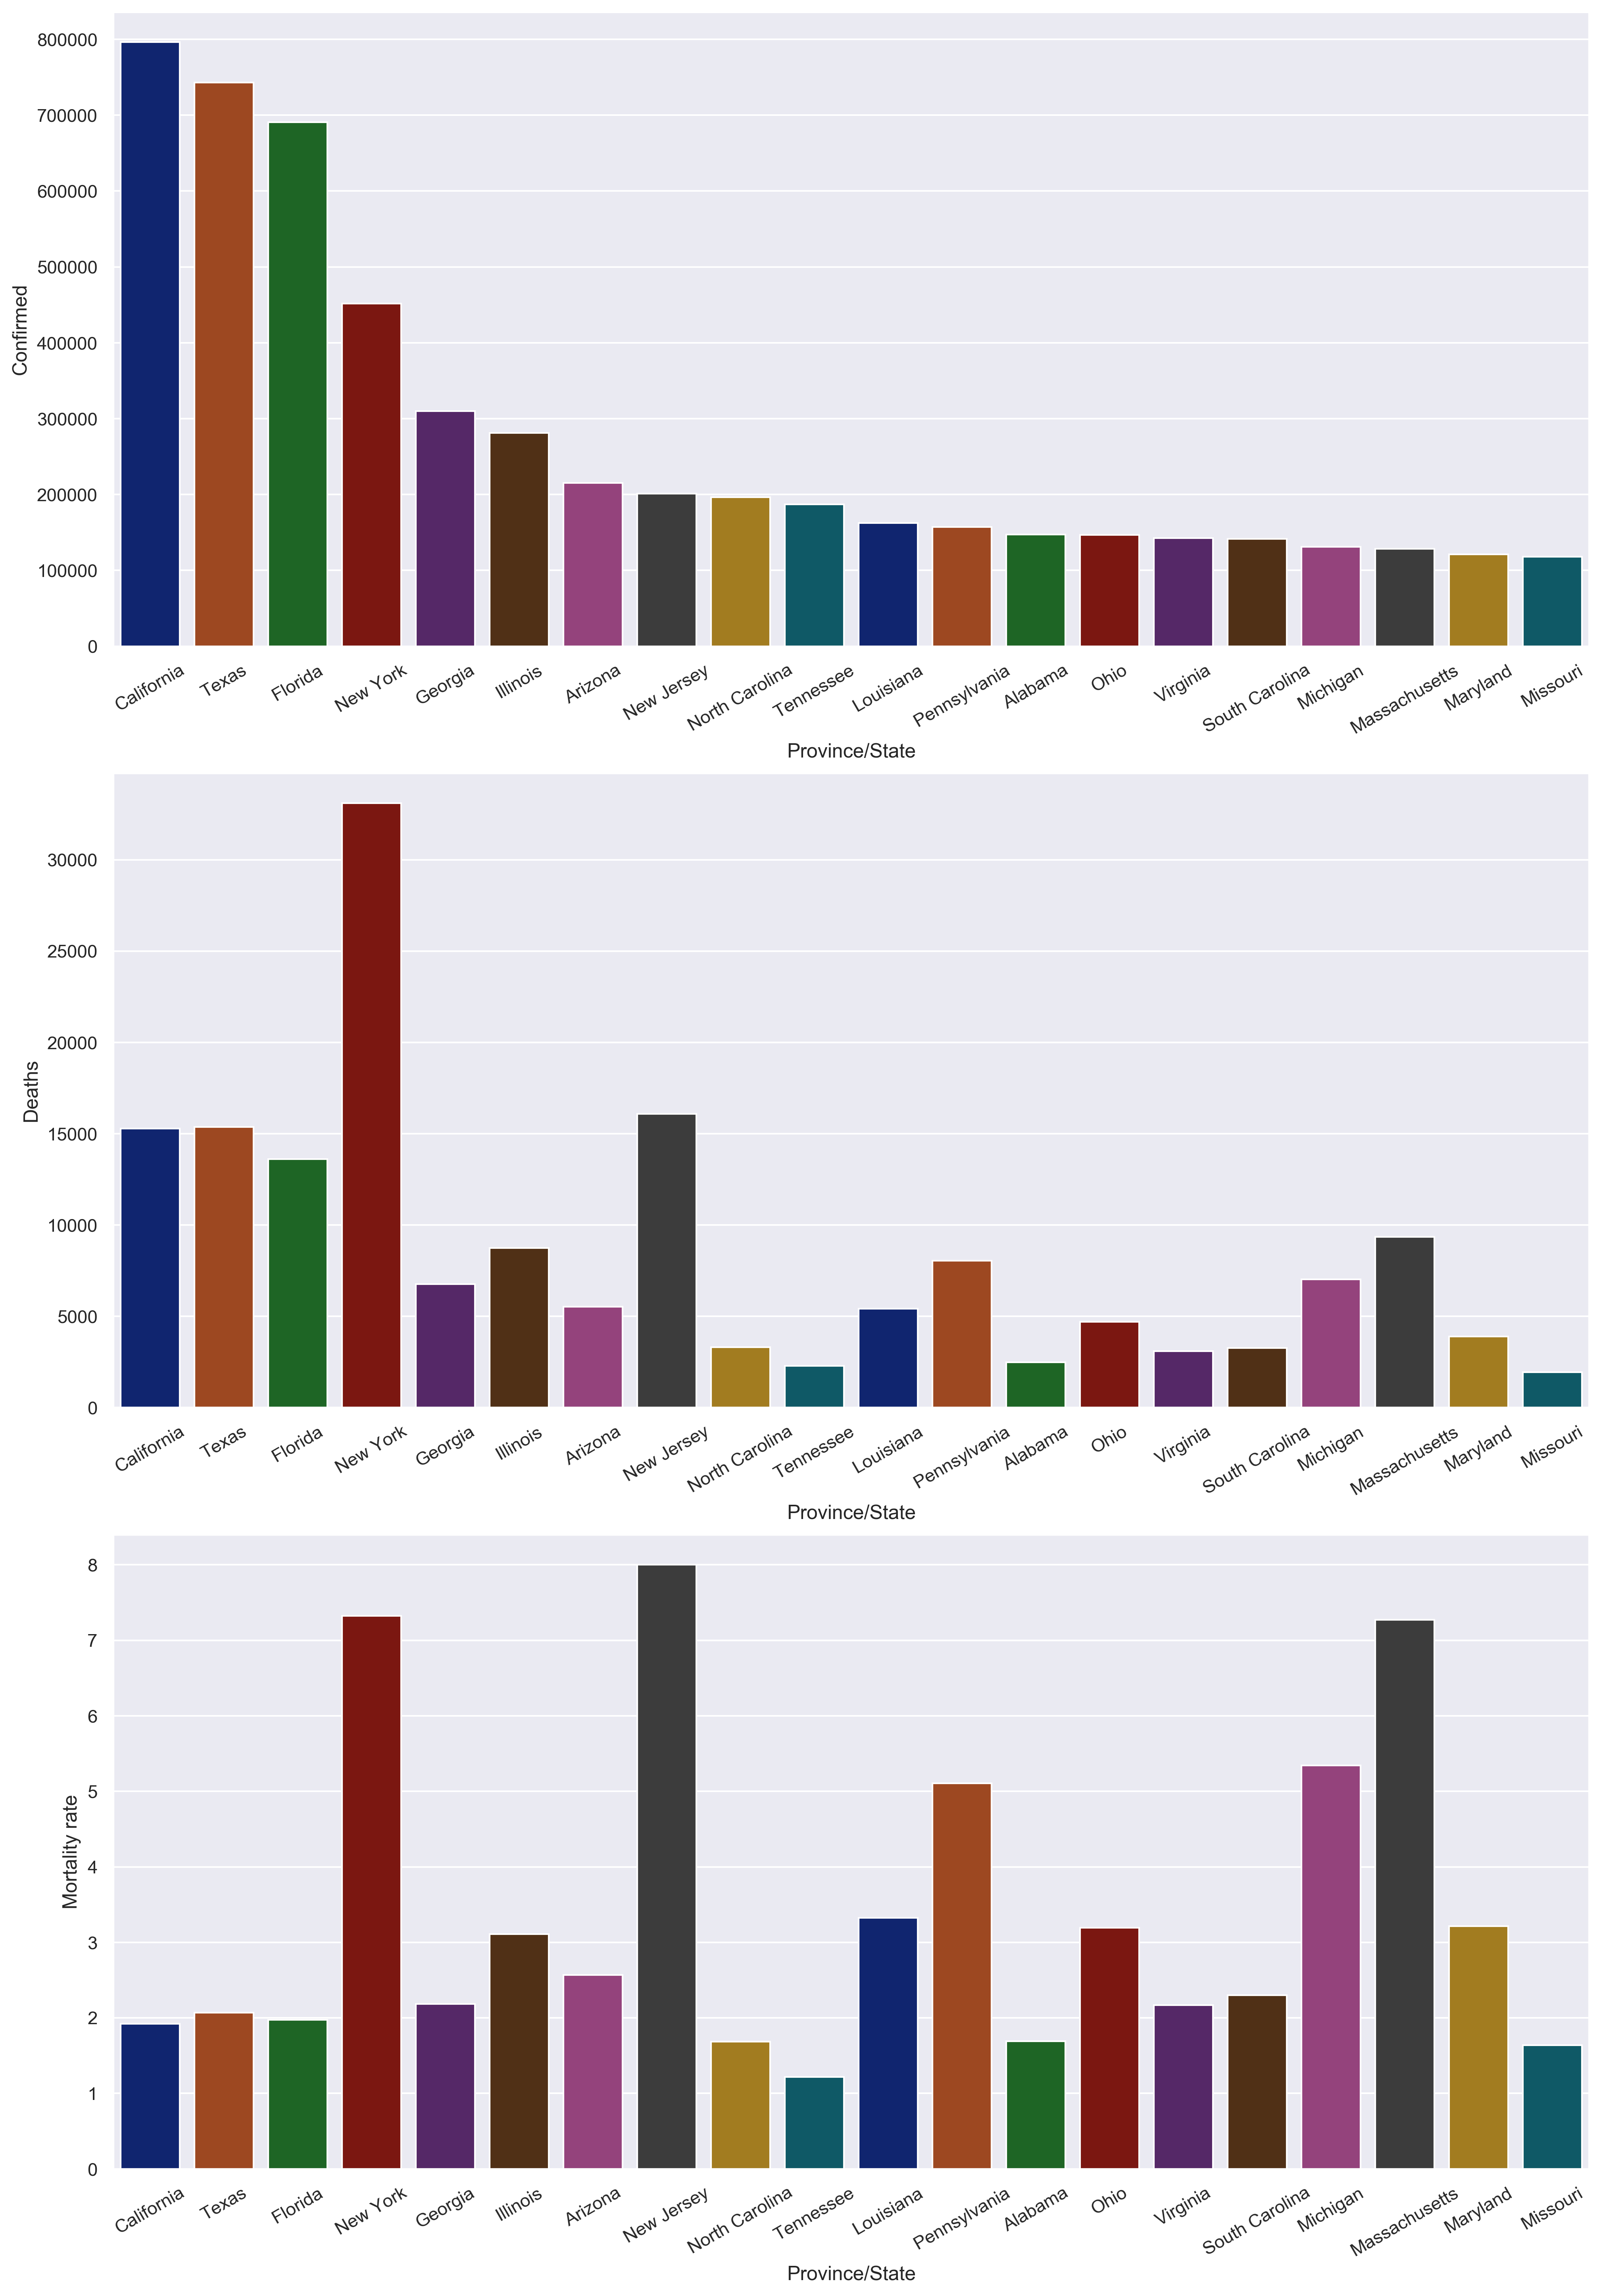

In [63]:
fig, ax = plt.subplots(3, 1, figsize = (16, 24), dpi=300)
sns.barplot(x=data_USA_state.index, y=data_USA_state['Confirmed'], ax=ax[0], palette="dark")
# sns.barplot(x=data_USA_state.index, y=data_USA_state['Recovered'], ax=ax[1], palette="dark")
sns.barplot(x=data_USA_state.index, y=data_USA_state['Deaths'], ax=ax[1], palette="dark")
sns.barplot(x=data_USA_state.index, y=data_USA_state['Mortality rate'], ax=ax[2], palette="dark")
# sns.barplot(x=data_USA_state.index, y=data_USA_state['Recovery rate'], ax=ax[4], palette="dark")
ax[0].set_xticklabels(ax[0].get_xticklabels() ,rotation=30);
# ax[1].set_xticklabels(ax[0].get_xticklabels() ,rotation=30);
ax[1].set_xticklabels(ax[1].get_xticklabels() ,rotation=30);
ax[2].set_xticklabels(ax[2].get_xticklabels() ,rotation=30);
# ax[4].set_xticklabels(ax[0].get_xticklabels() ,rotation=30);

In [64]:
data.head()

ObservationDate Province/State  Country/Region      Last Update  \
SNo                                                                   
1        2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
2        2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
3        2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
4        2020-01-22         Fujian  Mainland China  1/22/2020 17:00   
5        2020-01-22          Gansu  Mainland China  1/22/2020 17:00   

     Confirmed  Deaths  Recovered  
SNo                                
1          1.0     0.0        0.0  
2         14.0     0.0        0.0  
3          6.0     0.0        0.0  
4          1.0     0.0        0.0  
5          0.0     0.0        0.0

In [65]:
data.shape

(116805, 7)

In [66]:
data.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [67]:
India_model = data[data['Country/Region']=='India'].groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Recovered':'sum','Deaths':'sum'})

In [68]:
India_model

Confirmed  Recovered   Deaths
ObservationDate                               
2020-01-30             1.0        0.0      0.0
2020-01-31             1.0        0.0      0.0
2020-02-01             1.0        0.0      0.0
2020-02-02             2.0        0.0      0.0
2020-02-03             3.0        0.0      0.0
...                    ...        ...      ...
2020-09-19       5308014.0  4208431.0  85619.0
2020-09-20       5400619.0  4303043.0  86752.0
2020-09-21       5487580.0  4396399.0  87882.0
2020-09-22       5562663.0  4497867.0  88935.0
2020-09-23       5646010.0  4587613.0  90020.0

[238 rows x 3 columns]

In [69]:
# India_model=India_model.dropna(axis=0)

In [70]:
India_model.shape

(238, 3)

In [71]:
India_model.dtypes

Confirmed    float64
Recovered    float64
Deaths       float64
dtype: object

In [72]:
India_model.head()

Confirmed  Recovered  Deaths
ObservationDate                              
2020-01-30             1.0        0.0     0.0
2020-01-31             1.0        0.0     0.0
2020-02-01             1.0        0.0     0.0
2020-02-02             2.0        0.0     0.0
2020-02-03             3.0        0.0     0.0

In [73]:
India_model = India_model.diff().fillna(0)

In [74]:
India_model.reset_index(inplace=True)

In [75]:
India_model

ObservationDate  Confirmed  Recovered  Deaths
0        2020-01-30        0.0        0.0     0.0
1        2020-01-31        0.0        0.0     0.0
2        2020-02-01        0.0        0.0     0.0
3        2020-02-02        1.0        0.0     0.0
4        2020-02-03        1.0        0.0     0.0
..              ...        ...        ...     ...
233      2020-09-19    93337.0    95880.0  1247.0
234      2020-09-20    92605.0    94612.0  1133.0
235      2020-09-21    86961.0    93356.0  1130.0
236      2020-09-22    75083.0   101468.0  1053.0
237      2020-09-23    83347.0    89746.0  1085.0

[238 rows x 4 columns]

In [76]:
India_model.dtypes

ObservationDate    datetime64[ns]
Confirmed                 float64
Recovered                 float64
Deaths                    float64
dtype: object

In [77]:
x = India_model.iloc[0,0]

In [78]:
x

Timestamp('2020-01-30 00:00:00')

In [79]:
India_model['ObservationDate']=India_model['ObservationDate'].map(dt.datetime.toordinal)

In [80]:
India_model.head()

ObservationDate  Confirmed  Recovered  Deaths
0           737454        0.0        0.0     0.0
1           737455        0.0        0.0     0.0
2           737456        0.0        0.0     0.0
3           737457        1.0        0.0     0.0
4           737458        1.0        0.0     0.0

In [81]:
eg = dt.date.fromordinal(737454)

In [82]:
# from sklearn.model_selection import train_test_split

In [83]:
X = India_model.iloc[:,0].values

In [84]:
Y = India_model.iloc[:,1].values

In [85]:
X=X.reshape(-1,1)

In [86]:
Y=Y.reshape(-1,1)

In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [88]:
regressor=LinearRegression()

In [89]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
prediction=regressor.predict(X_test)

In [91]:
prediction.shape

(48, 1)

In [92]:
# Y_test.shape

In [93]:
# Y_test, prediction

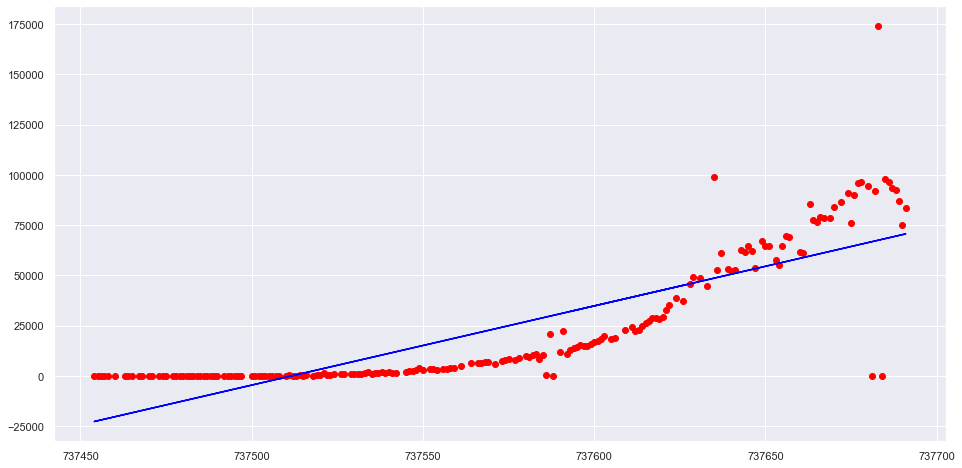

In [94]:
plt.figure(figsize=(16,8))
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

In [95]:
dt.date.fromordinal(737650)

datetime.date(2020, 8, 13)

In [96]:
regressor.predict([[737790]])

array([[109617.73175198]])

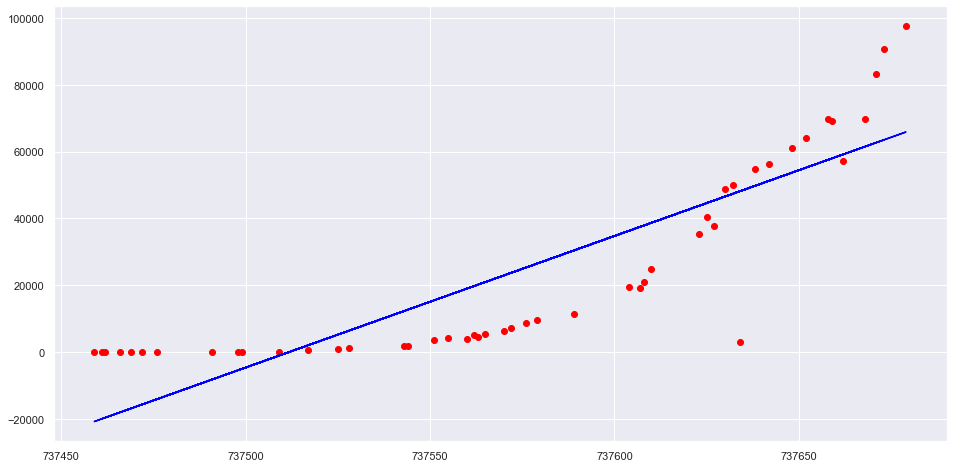

In [97]:
# Visualising the Test set results
plt.figure(figsize=(16,8))
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')

In [98]:
regressor_full = LinearRegression()
regressor_full.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
dt.date.fromordinal(737790)

datetime.date(2020, 12, 31)

In [100]:
regressor_full.predict([[737790]])

array([[108203.44347411]])

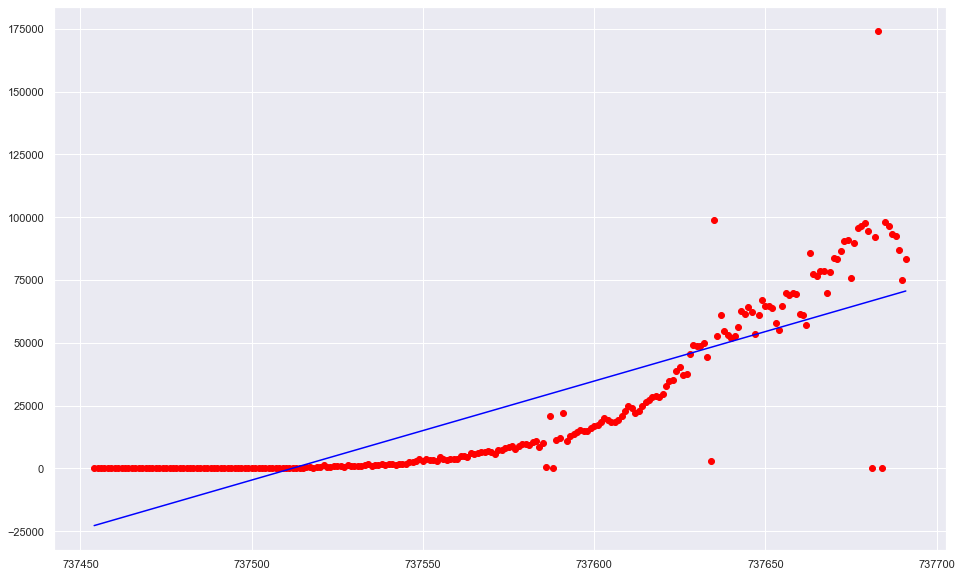

In [111]:
plt.figure(figsize=(16,10))
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')

In [102]:
X_test_new = np.arange(737700,738080)

In [103]:
dt.date.fromordinal(737790)

datetime.date(2020, 12, 31)

In [104]:
X_test_new=X_test_new.reshape(-1,1)

In [105]:
# regressor_full.predict(X_test_new)

In [113]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split
polynom = PolynomialFeatures(degree = 2)
X_polynom = polynom.fit_transform(X)
X_polynom

array([[1.00000000e+00, 7.37454000e+05, 5.43838402e+11],
       [1.00000000e+00, 7.37455000e+05, 5.43839877e+11],
       [1.00000000e+00, 7.37456000e+05, 5.43841352e+11],
       [1.00000000e+00, 7.37457000e+05, 5.43842827e+11],
       [1.00000000e+00, 7.37458000e+05, 5.43844302e+11],
       [1.00000000e+00, 7.37459000e+05, 5.43845777e+11],
       [1.00000000e+00, 7.37460000e+05, 5.43847252e+11],
       [1.00000000e+00, 7.37461000e+05, 5.43848727e+11],
       [1.00000000e+00, 7.37462000e+05, 5.43850201e+11],
       [1.00000000e+00, 7.37463000e+05, 5.43851676e+11],
       [1.00000000e+00, 7.37464000e+05, 5.43853151e+11],
       [1.00000000e+00, 7.37465000e+05, 5.43854626e+11],
       [1.00000000e+00, 7.37466000e+05, 5.43856101e+11],
       [1.00000000e+00, 7.37467000e+05, 5.43857576e+11],
       [1.00000000e+00, 7.37468000e+05, 5.43859051e+11],
       [1.00000000e+00, 7.37469000e+05, 5.43860526e+11],
       [1.00000000e+00, 7.37470000e+05, 5.43862001e+11],
       [1.00000000e+00, 7.37471

In [112]:
from sklearn.linear_model import LinearRegression
polyreg = LinearRegression()
polyreg.fit(X_polynom,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

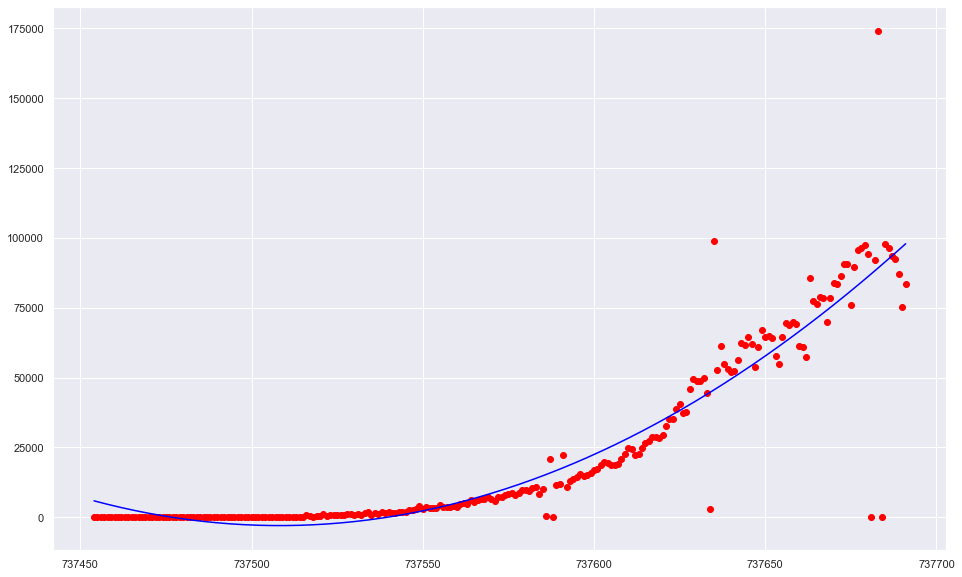

In [132]:
plt.figure(figsize=(16,10))
plt.scatter(X, Y, color = 'red')
plt.plot(X, polyreg.predict(X_polynom), color = 'blue')

In [115]:
dt.date.fromordinal(737790)

datetime.date(2020, 12, 31)

In [130]:
polyreg.predict(X_polynom)

array([[ 5.84423511e+03],
       [ 5.52001929e+03],
       [ 5.20184253e+03],
       [ 4.88970508e+03],
       [ 4.58360669e+03],
       [ 4.28354785e+03],
       [ 3.98952808e+03],
       [ 3.70154834e+03],
       [ 3.41960718e+03],
       [ 3.14370532e+03],
       [ 2.87384277e+03],
       [ 2.61001953e+03],
       [ 2.35223535e+03],
       [ 2.10049072e+03],
       [ 1.85478564e+03],
       [ 1.61511938e+03],
       [ 1.38149243e+03],
       [ 1.15390479e+03],
       [ 9.32356445e+02],
       [ 7.16847168e+02],
       [ 5.07377930e+02],
       [ 3.03947266e+02],
       [ 1.06555908e+02],
       [-8.47961426e+01],
       [-2.70108887e+02],
       [-4.49382568e+02],
       [-6.22616699e+02],
       [-7.89811279e+02],
       [-9.50966797e+02],
       [-1.10608325e+03],
       [-1.25516040e+03],
       [-1.39819849e+03],
       [-1.53519702e+03],
       [-1.66615576e+03],
       [-1.79107593e+03],
       [-1.90995679e+03],
       [-2.02279834e+03],
       [-2.12960059e+03],
       [-2.2

In [126]:
# polynom_p = PolynomialFeatures(degree = 2)
# p_polynom = polynom_p.fit_transform([[737790]])
# p_polynom

In [125]:
# from statsmodels.tsa.arima_model import ARIMA

# #p,d,q  p = periods taken for autoregressive model
# #d -> Integrated order, difference
# # q periods in moving average model
# model_arima = ARIMA(X_train,order=(9, 2, 0))
# model_arima_fit = model_arima.fit()
# print(model_arima_fit.aic)

# predictions= model_arima_fit.forecast(steps=10)[0]
# predictions

# plt.plot(X,Y)
# plt.plot(predictions,color='red')